# <center>House Price Prediction

## Dataset
The **Ames housing dataset** will be used to predict house prices [[9](http://jse.amstat.org/v19n3/decock.pdf)]. 

- This dataset contains 79 explanatory variables describing (almost) every aspect of residential homes in Ames. 

- The variable number 80 is the Sale Price which is the target variable to be predicted using other variables. 

- It is more complex to handle, containing too many features and variables, missing data, outliers, and both numerical and categorical features.


## Exploratory Data Analysis (EDA)
Exploratory Data Analysis is a very important process to perform initial investigations on dataset, understand the data, discover the patterns in the data to identify anomalies, test hypothesis and to check assumptions with the help of summary statistics and graphical representations. It is all about making sense of data in hand and getting important insights from it.

- The dataset has two parts train dataset and test dataset. 

- The size of train dataset is **(118,260)** with shape of **(1460, 81)** whereas the size of test set is **(116,720)** with shape of **(1459, 80)**. 

- Also, the type of data is heterogeneous containing both numerical (*quantitative*) and categorical (*qualitative*) data with number of **38** and **43** variables respectively.

- After exploring the data, the next step is to explore the *target variable* which is the **SalePrice**. 
- Univariate analysis will be used to get more knowledge about the target variable and other important dependant variables using distribution plots (histogram/displot) and probability plot. 
- Multivariate analysis will be used to understand the relationship between the target variable (SalesPrice) and other variables (predictors). 
- For numerical variables, scatter plot, correlation matrix, and pair plot will be used to study the relationship between target variable and numerical variables. 
- For categorical variables, bar plot and boxplot will be used to study the relationship between target variable and categorical variables. 

The figure below summarizes the workflow of exploratory data analysis.


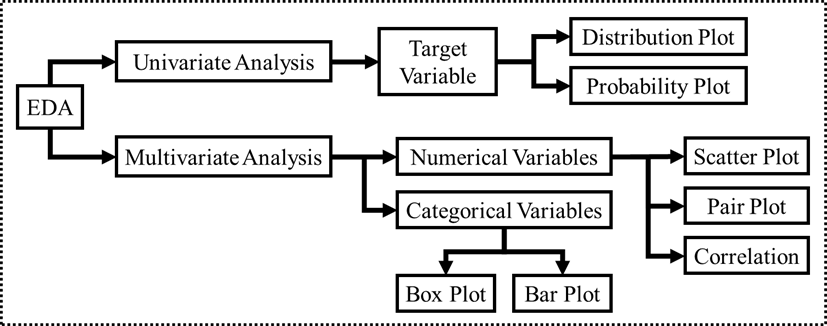


**<center> Figure 1: Exploratory Data Analysis Workflow.**
    
    

    


 # Step 1: Import Python Libraries

In [1]:
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from category_encoders import MEstimateEncoder
from sklearn.feature_selection import mutual_info_regression

from scipy.stats import norm
from scipy import stats


print('Libraries have been imported.')

Libraries have been imported.


In [ ]:
# import libraries
# Essential libraries
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
# Plot libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from category_encoders import MEstimateEncoder

# models
#from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
#from xgboost import XGBRegressor
#from sklearn.model_selection import KFold, cross_val_score
#from sklearn.linear_model import Ridge, RidgeCV
#from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
#from category_encoders import MEstimateEncoder
#from sklearn.cluster import KMeans
#from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression

# stats
from scipy.stats import norm
from scipy import stats

# others
#import optuna
#import shap
#import pickle
#from pathlib import Path

print('Libraries have been imported.')

# Step 2: Data Discovery

**Acknowledgments**
>The dataset we are going to use is Ames Housing dataset from Kaggle: (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

>The Ames Housing dataset was compiled by Dean De Cock for use in data science education:(http://jse.amstat.org/v19n3/decock.pdf).

>The datset contains 79 explanatory variables describing (almost) every aspect of residential homes in Ames, so the goal of the project is to predict the final price of each home.

**Importing the Dataset**

Now, read in the dataset using pandas library.

In [2]:
# Now, we add our dataset here. To do that we need to upload the csv file on google colab
#from google.colab import files
#uploaded = files.upload()

In [3]:
# Load the data


In [4]:
# tip
#solution.tip1()
solution.sol1()

NameError: name 'solution' is not defined

In [8]:
# import training data
df_train = pd.read_csv('data/train.csv')
#df_train = df_train.drop(columns= 'Id')
# import test data
df_test = pd.read_csv('data/test.csv')
# df_test = df_test.drop(columns='Id')

In [9]:
print('The size of trainset is ({:,}) with shape of {}'.format(df_train.size,df_train.shape))
print('The size of testset is ({:,}) with shape of {}'.format(df_test.size,df_test.shape))

The size of trainset is (118,260) with shape of (1460, 81)
The size of testset is (116,720) with shape of (1459, 80)


In [10]:
display(df_train.head())
display(df_test.head())

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [11]:
# let’s take a look at the variables by calling the columns of the dataset.
# the data contains numeric variables and categorical variables (# nominal vars and # ranking vars).
#You can also think of numeric variables as continuous variables and other variables as categorical variables.
#However, there may be categorical variables among numeric variables.
#I thought the most obvious way to distinguish them is to read the variable manual and distinguish them directly.

In [12]:
# Discover the quantitatives and qualitatives
cols = df_train.columns
quantitatives = df_train.select_dtypes(exclude={'object'}).columns
qualitatives = df_train.select_dtypes(include={'object'}).columns
print("Number of quantitative variables: {}".format(len(quantitatives)))
print(quantitatives)
print("Number of qualitative variables: {}".format(len(qualitatives)))
print(qualitatives)

Number of quantitative variables: 38
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Number of qualitative variables: 43
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtC

In [13]:
# Now we check the column names and their data types. We can do everything using one command we already know:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [14]:
# Check if there are some duplicate ids in our data and remove them:

#check for dupes for Id
idsUnique = len(set(df_train.Id))
idsTotal = df_train.shape[0]
idsdupe = idsTotal - idsUnique
print(idsdupe)
#drop id col
#df_train.drop(['Id'],axis =1,inplace=True)

0


We see that there are no duplicates, which is good, so we can continue.

## Exploratory Data Analysis

In [15]:
#Next, let’s take a look at the summary information of the dataset.
#This time, we checked basic statistics for continuous variables.
#I found that the minimum value of some variables is zero

In [16]:
df_train.describe().transpose()

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Looking at the dataframe general information, we can see that 80 features are availables and that the dataset contains 1460 samples. However, some features contains missing values. Also, the type of data is heterogeneous: both numerical and categorical data are available.

**Exploring the Target Variable**

In [18]:
#Exploring the Target Variable
#The goal of this project is to predict the price of a house. These values are stored in the variable SalePrice.

#Let's check the descriptive statistics and the histogram:

# descriptive statistics
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


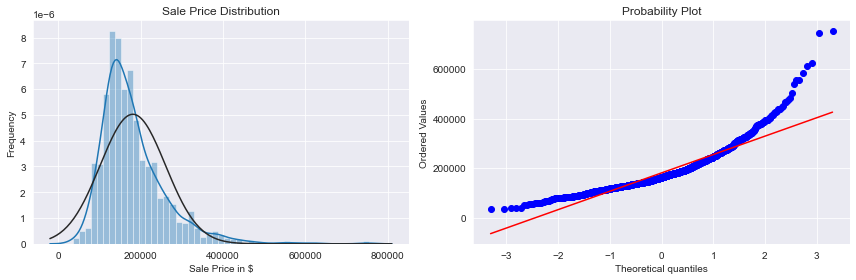

In [19]:
# Figure
#from matplotlib import style
#style.use('fivethirtyeight')
plt.figure(figsize=(12, 4))
#plt.suptitle("Visualising the skewness of the SalePrice target variable")

# Distribution Plot 
plt.subplot(1, 2, 1)
sns.distplot(df_train['SalePrice'], fit= norm)
plt.title("Sale Price Distribution")
plt.xlabel("Sale Price in $")
plt.ylabel("Frequency")

# Probability Plot
plt.subplot(1, 2, 2)
stats.probplot(df_train['SalePrice'], plot=plt)
#res = stats.probplot(df_train['SalePrice'], plot= plt)

plt.tight_layout()
plt.show()
#plt.clf()

F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


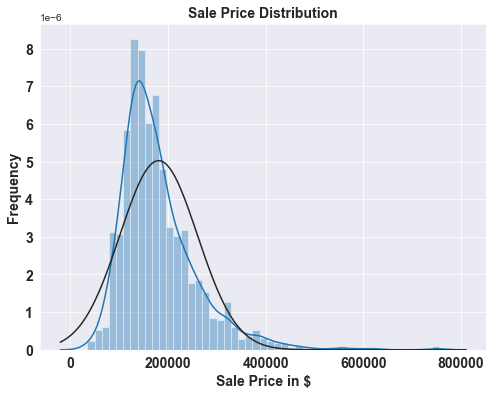

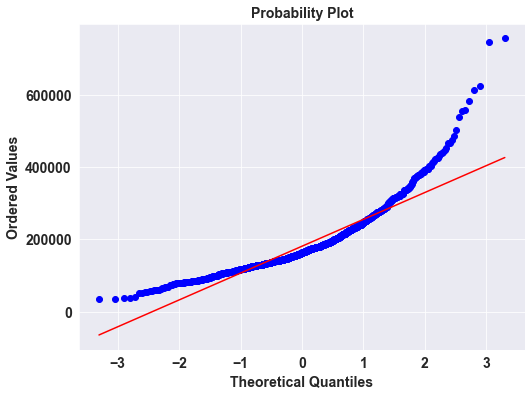

In [20]:
# histogram
fig = plt.figure(figsize = (8,6))
sns.distplot(df_train['SalePrice'], fit= norm)
plt.title("Sale Price Distribution",fontsize = 14,fontweight='bold')
plt.xlabel("Sale Price in $",fontsize = 14,fontweight='bold')
plt.ylabel("Frequency",fontsize = 14,fontweight='bold')
plt.xticks(fontsize=14,fontweight='bold')
plt.yticks(fontsize=14,fontweight='bold')


fig = plt.figure(figsize = (8,6))
res = stats.probplot(df_train['SalePrice'], plot= plt)
plt.title("Probability Plot",fontsize = 14,fontweight='bold')
plt.xlabel("Theoretical Quantiles",fontsize = 14,fontweight='bold')
plt.ylabel("Ordered Values",fontsize = 14,fontweight='bold')
plt.xticks(fontsize=14,fontweight='bold');
plt.yticks(fontsize=14,fontweight='bold');

* "skew" means skewness and "kurt" means kurtosis.
* Skewness represents the bias of the distribution, and kurtosis represents the sharpness of the distribution.
* I thought about why to check these indicators and concluded that it was because it was an indicator that could judge the normality of the variable.
* Variables, especially dependent variables, must follow normality to ensure that the model performs well. The absolute value of skewness is 0-3 and kurtosis is 1-8.
* The histogram is a good chart to check the distribution of variables.
* The qq plot is a good chart for determining normality, and the point must follow the red diagonal.
* Currently, it is difficult to judge that the dependent variable is perfectly normal.

In [21]:
# skewness and kurtosis
print(f"Skewness: {df_train['SalePrice'].skew()}")
print(f"Kurtosis: {df_train['SalePrice'].kurt()}")
# The SalePrice is positive skewed, and show peakedness.

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


In the graph above we can observe the following things: 
- Most of the density of sale's price lies between 100k and 200k.
- It slightly deviates from a normal distribution. 
- It's skewed. 
- It has some outliers (i.e. really huge prices).

We see that the distribution has a long tail. It means that most of the house are normally distributed but a couple of houses have a higher than normal value. It could be critical to take this peculiarity into account when designing a predictive model.

## Univariate Analysis: Numerical Variable

Seaborn’s function distplot has options for:

bins: the bins setting
It’s useful to plot the variable with different bins settings to discover patterns. If we don’t set this value, the library will find a useful default for us.
kde: whether to plot a Gaussian kernel density estimate
This helps to estimate the shape of the probability density function of a continuous random variable. More details can be found on seaborn’s page.
rug: whether to draw a rug plot on the support axis
This draws a small vertical tick at each observation. It helps to know the exact position of the values for the variable.

In [22]:
#First, we will have a look at the data represented with numbers.

numerical_data = df_train.select_dtypes("number")

In [207]:
numerical_data.head().transpose()

0       1        2       3        4
MSSubClass       60.0    20.0     60.0    70.0     60.0
LotFrontage      65.0    80.0     68.0    60.0     84.0
LotArea        8450.0  9600.0  11250.0  9550.0  14260.0
OverallQual       7.0     6.0      7.0     7.0      8.0
OverallCond       5.0     8.0      5.0     5.0      5.0
YearBuilt      2003.0  1976.0   2001.0  1915.0   2000.0
YearRemodAdd   2003.0  1976.0   2002.0  1970.0   2000.0
MasVnrArea      196.0     0.0    162.0     0.0    350.0
BsmtFinSF1      706.0   978.0    486.0   216.0    655.0
BsmtFinSF2        0.0     0.0      0.0     0.0      0.0
BsmtUnfSF       150.0   284.0    434.0   540.0    490.0
TotalBsmtSF     856.0  1262.0    920.0   756.0   1145.0
1stFlrSF        856.0  1262.0    920.0   961.0   1145.0
2ndFlrSF        854.0     0.0    866.0   756.0   1053.0
LowQualFinSF      0.0     0.0      0.0     0.0      0.0
GrLivArea      1710.0  1262.0   1786.0  1717.0   2198.0
BsmtFullBath      1.0     0.0      1.0     1.0      1.0
BsmtHalfBath      0.0     1.0      0.0     0.0      0.0
FullBath          2.0     2.0      2.0     1.0      2.0
HalfBath          1.0     0.0      1.0     0.0      1.0
BedroomAbvGr      3.0     3.0      3.0     3.0      4.0
KitchenAbvGr      1.0     1.0      1.0     1.0      1.0
TotRmsAbvGrd      8.0     6.0      6.0     7.0      9.0
Fireplaces        0.0     1.0      1.0     1.0      1.0
GarageYrBlt    2003.0  1976.0   2001.0  1998.0   2000.0
GarageCars        2.0     2.0      2.0     3.0      3.0
GarageArea      548.0   460.0    608.0   642.0    836.0
WoodDeckSF        0.0   298.0      0.0     0.0    192.0
OpenPorchSF      61.0     0.0     42.0    35.0     84.0
EnclosedPorch     0.0     0.0      0.0   272.0      0.0
3SsnPorch         0.0     0.0      0.0     0.0      0.0
ScreenPorch       0.0     0.0      0.0     0.0      0.0
PoolArea          0.0     0.0      0.0     0.0      0.0
MiscVal           0.0     0.0      0.0     0.0      0.0
MoSold            2.0     5.0      9.0     2.0     12.0
YrSold         2008.0  2007.0   2008.0  2006.0   2008.0

We see that the data are mainly represented with integer number. Let’s have a look at the histogram for all these features.

In [36]:
numerical_data = numerical_data.drop(columns= ['Id','SalePrice'])
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [37]:
numerical_data.describe().transpose()

count          mean          std     min      25%     50%  \
MSSubClass     1460.0     56.897260    42.300571    20.0    20.00    50.0   
LotFrontage    1201.0     70.049958    24.284752    21.0    59.00    69.0   
LotArea        1460.0  10516.828082  9981.264932  1300.0  7553.50  9478.5   
OverallQual    1460.0      6.099315     1.382997     1.0     5.00     6.0   
OverallCond    1460.0      5.575342     1.112799     1.0     5.00     5.0   
YearBuilt      1460.0   1971.267808    30.202904  1872.0  1954.00  1973.0   
YearRemodAdd   1460.0   1984.865753    20.645407  1950.0  1967.00  1994.0   
MasVnrArea     1452.0    103.685262   181.066207     0.0     0.00     0.0   
BsmtFinSF1     1460.0    443.639726   456.098091     0.0     0.00   383.5   
BsmtFinSF2     1460.0     46.549315   161.319273     0.0     0.00     0.0   
BsmtUnfSF      1460.0    567.240411   441.866955     0.0   223.00   477.5   
TotalBsmtSF    1460.0   1057.429452   438.705324     0.0   795.75   991.5   
1stFlrSF       1460.0   1162.626712   386.587738   334.0   882.00  1087.0   
2ndFlrSF       1460.0    346.992466   436.528436     0.0     0.00     0.0   
LowQualFinSF   1460.0      5.844521    48.623081     0.0     0.00     0.0   
GrLivArea      1460.0   1515.463699   525.480383   334.0  1129.50  1464.0   
BsmtFullBath   1460.0      0.425342     0.518911     0.0     0.00     0.0   
BsmtHalfBath   1460.0      0.057534     0.238753     0.0     0.00     0.0   
FullBath       1460.0      1.565068     0.550916     0.0     1.00     2.0   
HalfBath       1460.0      0.382877     0.502885     0.0     0.00     0.0   
BedroomAbvGr   1460.0      2.866438     0.815778     0.0     2.00     3.0   
KitchenAbvGr   1460.0      1.046575     0.220338     0.0     1.00     1.0   
TotRmsAbvGrd   1460.0      6.517808     1.625393     2.0     5.00     6.0   
Fireplaces     1460.0      0.613014     0.644666     0.0     0.00     1.0   
GarageYrBlt    1379.0   1978.506164    24.689725  1900.0  1961.00  1980.0   
GarageCars     1460.0      1.767123     0.747315     0.0     1.00     2.0   
GarageArea     1460.0    472.980137   213.804841     0.0   334.50   480.0   
WoodDeckSF     1460.0     94.244521   125.338794     0.0     0.00     0.0   
OpenPorchSF    1460.0     46.660274    66.256028     0.0     0.00    25.0   
EnclosedPorch  1460.0     21.954110    61.119149     0.0     0.00     0.0   
3SsnPorch      1460.0      3.409589    29.317331     0.0     0.00     0.0   
ScreenPorch    1460.0     15.060959    55.757415     0.0     0.00     0.0   
PoolArea       1460.0      2.758904    40.177307     0.0     0.00     0.0   
MiscVal        1460.0     43.489041   496.123024     0.0     0.00     0.0   
MoSold         1460.0      6.321918     2.703626     1.0     5.00     6.0   
YrSold         1460.0   2007.815753     1.328095  2006.0  2007.00  2008.0   

                    75%       max  
MSSubClass        70.00     190.0  
LotFrontage       80.00     313.0  
LotArea        11601.50  215245.0  
OverallQual        7.00      10.0  
OverallCond        6.00       9.0  
YearBuilt       2000.00    2010.0  
YearRemodAdd    2004.00    2010.0  
MasVnrArea       166.00    1600.0  
BsmtFinSF1       712.25    5644.0  
BsmtFinSF2         0.00    1474.0  
BsmtUnfSF        808.00    2336.0  
TotalBsmtSF     1298.25    6110.0  
1stFlrSF        1391.25    4692.0  
2ndFlrSF         728.00    2065.0  
LowQualFinSF       0.00     572.0  
GrLivArea       1776.75    5642.0  
BsmtFullBath       1.00       3.0  
BsmtHalfBath       0.00       2.0  
FullBath           2.00       3.0  
HalfBath           1.00       2.0  
BedroomAbvGr       3.00       8.0  
KitchenAbvGr       1.00       3.0  
TotRmsAbvGrd       7.00      14.0  
Fireplaces         1.00       3.0  
GarageYrBlt     2002.00    2010.0  
GarageCars         2.00       4.0  
GarageArea       576.00    1418.0  
WoodDeckSF       168.00     857.0  
OpenPorchSF       68.00     547.0  
EnclosedPorch      0.00     552.0  
3SsnPorch          0.00     508.0  
ScreenPorch   

In [56]:
#numerical_data.iloc[:,1]

In [57]:
numerical_cols = numerical_data.columns.tolist()

In [74]:
numerical_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [62]:
def num_distplot(df,i):
    cols = df.columns.tolist()
    fig = plt.figure(figsize = (8,6))
    sns.distplot(df.iloc[:,i], bins=50, kde=True, rug=True, fit= norm)
    plt.title(cols[i]+" Distribution",fontsize = 14,fontweight='bold')
    plt.xlabel(cols[i],fontsize = 14,fontweight='bold')
    plt.ylabel("Density",fontsize = 14,fontweight='bold')
    plt.xticks(fontsize=14,fontweight='bold');
    plt.yticks(fontsize=14,fontweight='bold');

F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


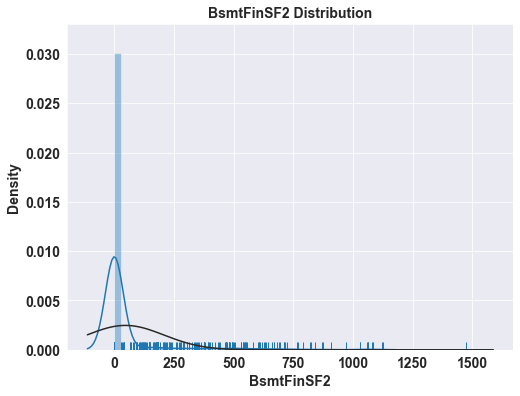

In [67]:
num_distplot(numerical_data,9)

In [42]:
numerical_cols = numerical_data.columns.tolist()

F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

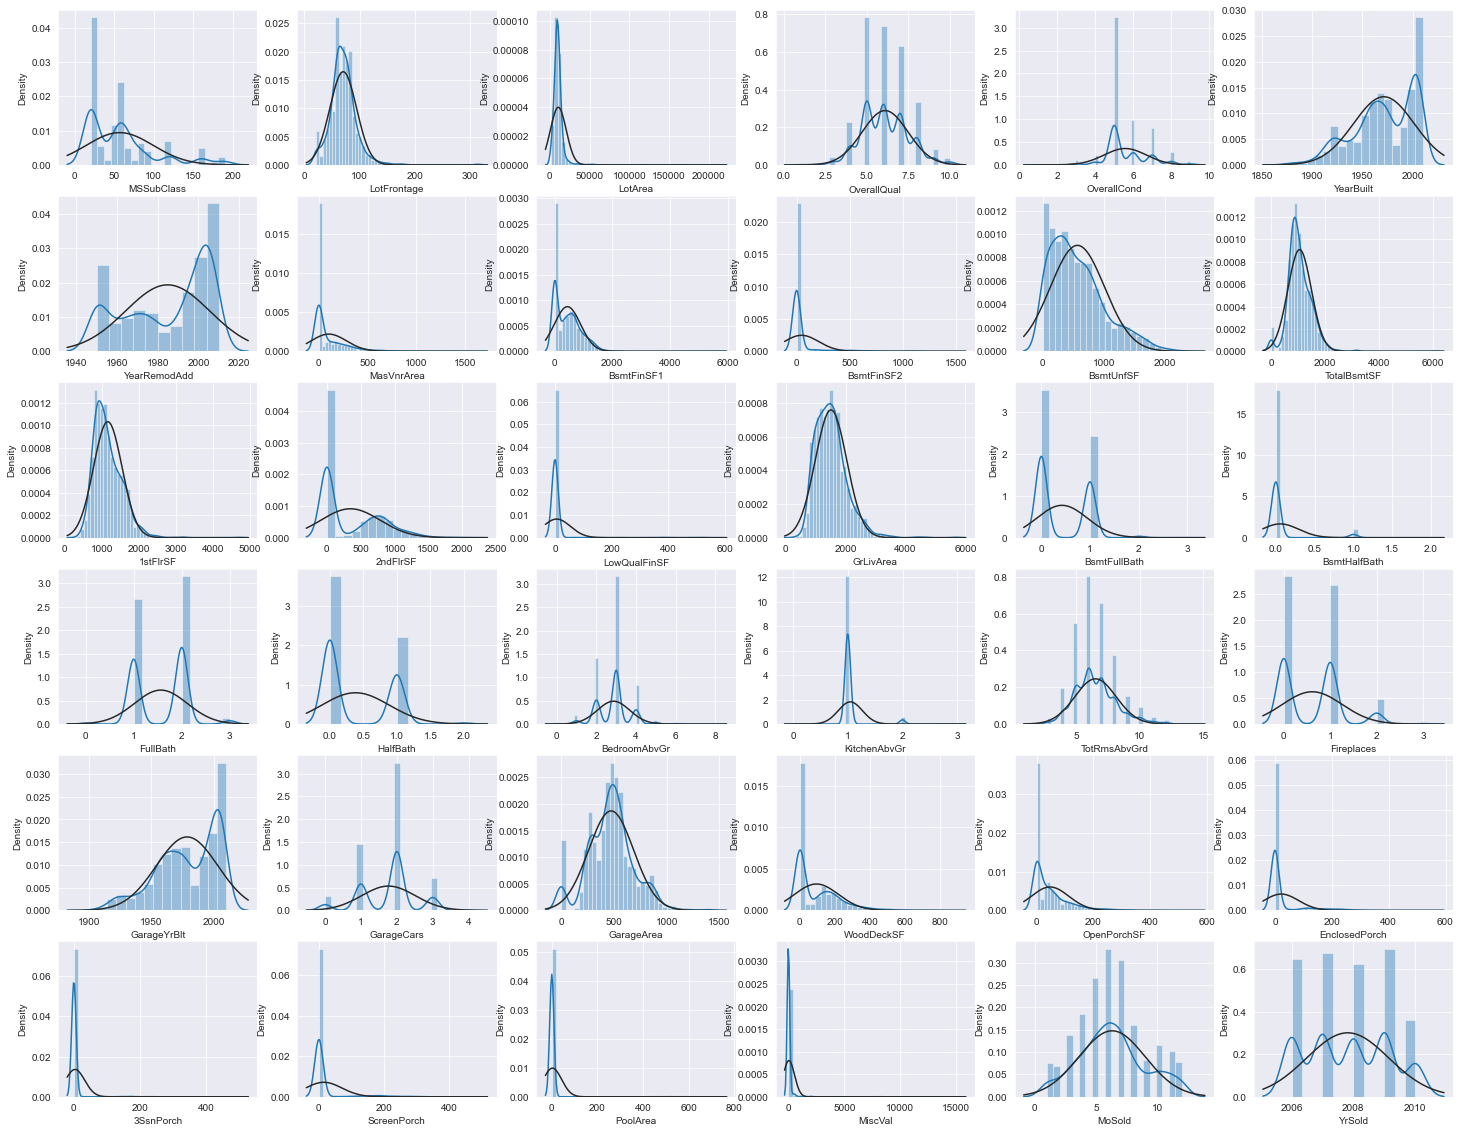

In [44]:
f, ax = plt.subplots(6, 6, figsize=(25, 20))
for i, c in enumerate(numerical_cols):
    sns.distplot(numerical_data[c], fit=stats.norm, ax=ax[i//6, i%6])

* Some variables seem to be able to follow a normal distribution through log transformation or box cox transformation. Some variables have zero. It seems that +1 should be done when converting.
* Draw a bar chart for categorical variables.
* Some variables were extremely biased toward one value (0). So they don't seem to be very important variables.

In [164]:
def num_histplot(df,i, density=True):
    cols = df.columns.tolist()
    fig = plt.figure(figsize = (8,6))
    df.iloc[:,i].hist(edgecolor="black", density=density)
    plt.title(cols[i]+" Distribution",fontsize = 14,fontweight='bold')
    plt.xlabel(cols[i],fontsize = 14,fontweight='bold')
    plt.ylabel("Density",fontsize = 14,fontweight='bold')
    plt.xticks(fontsize=14,fontweight='bold');
    plt.yticks(fontsize=14,fontweight='bold');

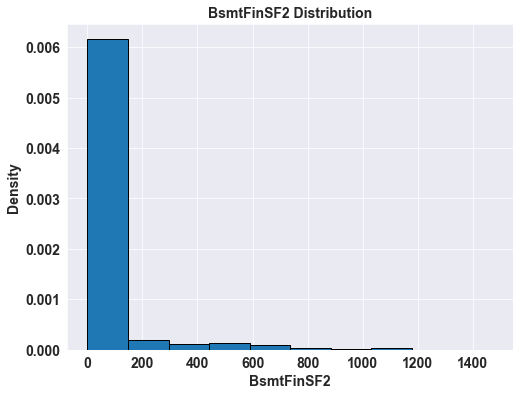

In [75]:
num_histplot(numerical_data,9)

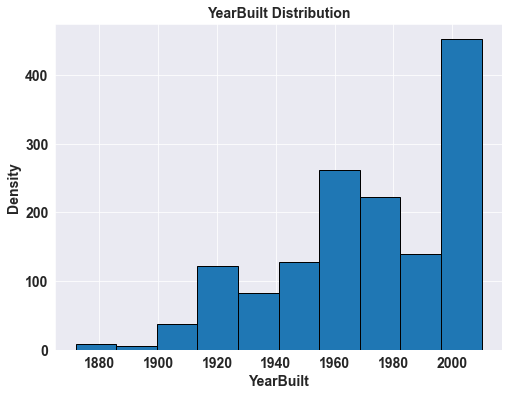

In [165]:
num_histplot(numerical_data,5, density=False)

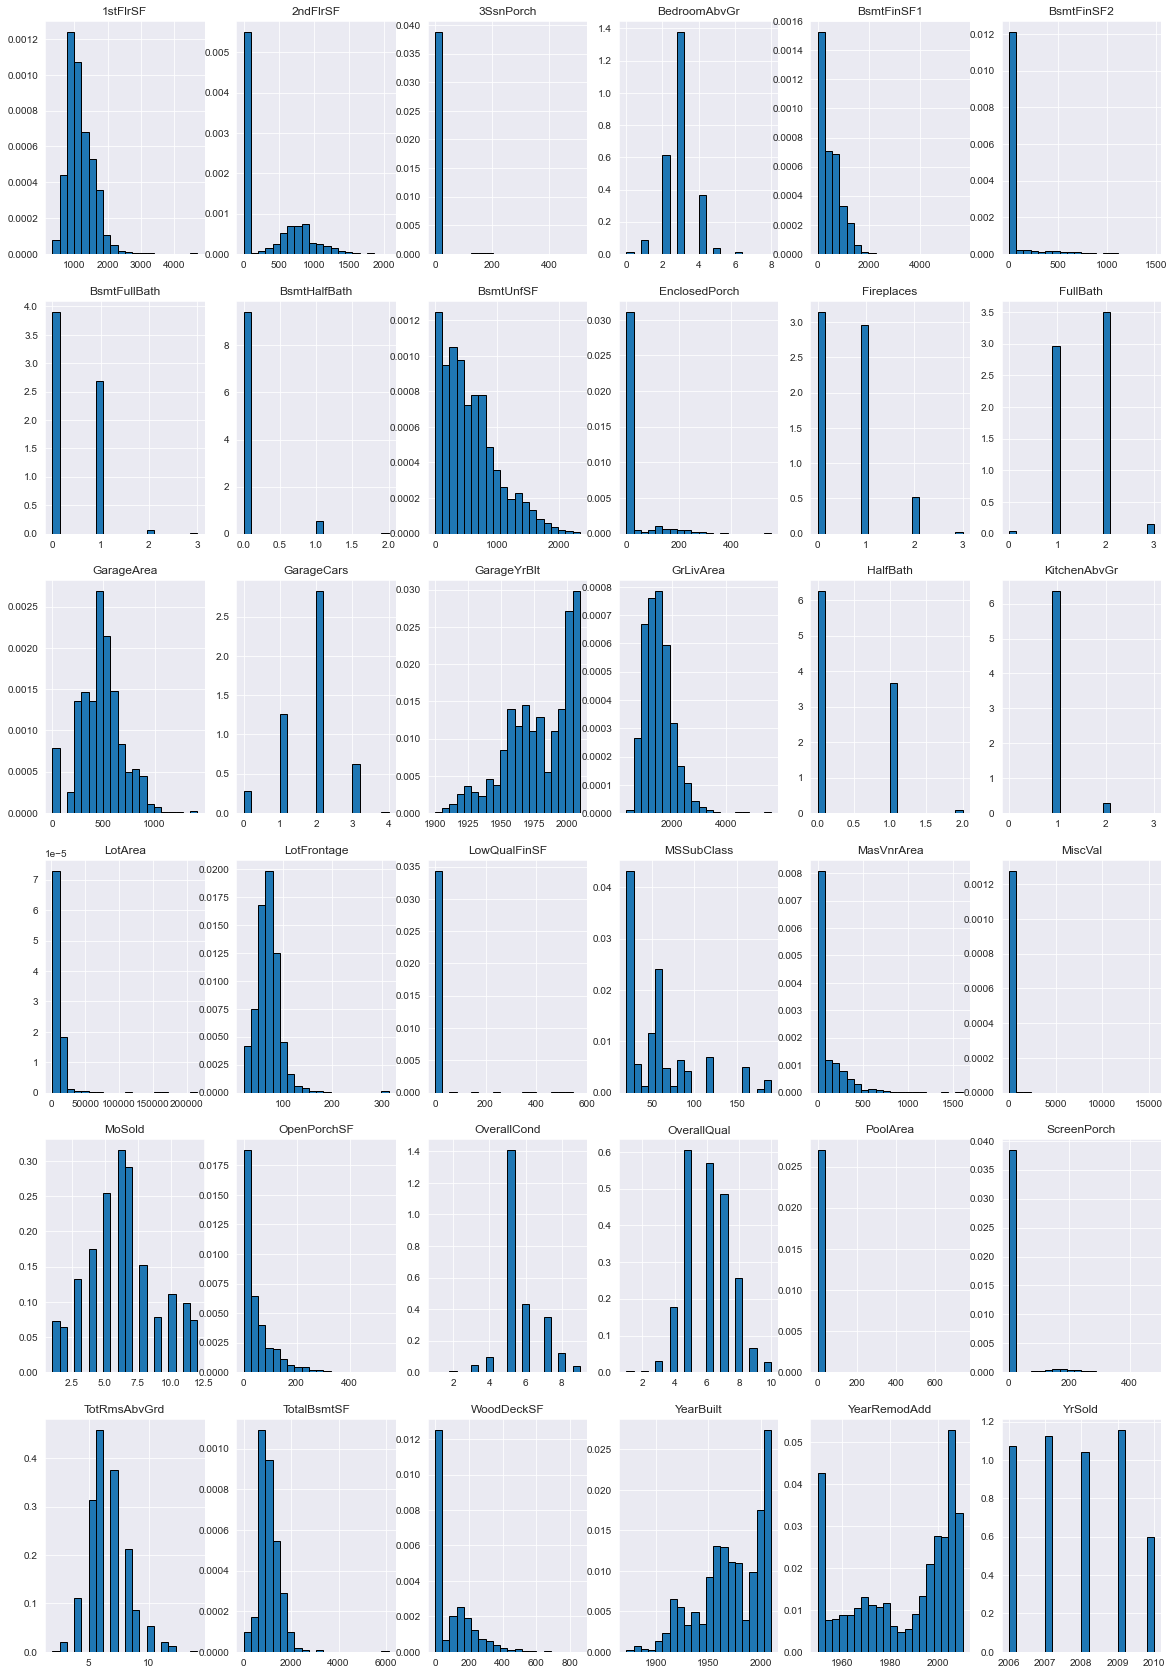

In [66]:
numerical_data.hist(bins=20, figsize=(20, 30), edgecolor="black", density=True,
                    layout=(6, 6))
plt.subplots_adjust(hspace=0.2, wspace=0.2)

We see that some features have high picks for 0. It could be linked that this value was assigned when the criterion did not apply, for instance the area of the swimming pool when no swimming pools are available.

We also have some feature encoding some date (for instance year).

These information are useful and should also be considered when designing a predictive model.

In [23]:
#Now, let’s have a look at the data encoded with strings.

string_data = df_train.select_dtypes(object)
string_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

In [24]:
string_data.head().transpose()

0        1        2        3        4
MSZoning            RL       RL       RL       RL       RL
Street            Pave     Pave     Pave     Pave     Pave
Alley              NaN      NaN      NaN      NaN      NaN
LotShape           Reg      Reg      IR1      IR1      IR1
LandContour        Lvl      Lvl      Lvl      Lvl      Lvl
Utilities       AllPub   AllPub   AllPub   AllPub   AllPub
LotConfig       Inside      FR2   Inside   Corner      FR2
LandSlope          Gtl      Gtl      Gtl      Gtl      Gtl
Neighborhood   CollgCr  Veenker  CollgCr  Crawfor  NoRidge
Condition1        Norm    Feedr     Norm     Norm     Norm
Condition2        Norm     Norm     Norm     Norm     Norm
BldgType          1Fam     1Fam     1Fam     1Fam     1Fam
HouseStyle      2Story   1Story   2Story   2Story   2Story
RoofStyle        Gable    Gable    Gable    Gable    Gable
RoofMatl       CompShg  CompShg  CompShg  CompShg  CompShg
Exterior1st    VinylSd  MetalSd  VinylSd  Wd Sdng  VinylSd
Exterior2nd    VinylSd  MetalSd  VinylSd  Wd Shng  VinylSd
MasVnrType     BrkFace     None  BrkFace     None  BrkFace
ExterQual           Gd       TA       Gd       TA       Gd
ExterCond           TA       TA       TA       TA       TA
Foundation       PConc   CBlock    PConc   BrkTil    PConc
BsmtQual            Gd       Gd       Gd       TA       Gd
BsmtCond            TA       TA       TA       Gd       TA
BsmtExposure        No       Gd       Mn       No       Av
BsmtFinType1       GLQ      ALQ      GLQ      ALQ      GLQ
BsmtFinType2       Unf      Unf      Unf      Unf      Unf
Heating           GasA     GasA     GasA     GasA     GasA
HeatingQC           Ex       Ex       Ex       Gd       Ex
CentralAir           Y        Y        Y        Y        Y
Electrical       SBrkr    SBrkr    SBrkr    SBrkr    SBrkr
KitchenQual         Gd       TA       Gd       Gd       Gd
Functional         Typ      Typ      Typ      Typ      Typ
FireplaceQu        NaN       TA       TA       Gd       TA
GarageType      Attchd   Attchd   Attchd   Detchd   Attchd
GarageFinish       RFn      RFn      RFn      Unf      RFn
GarageQual          TA       TA       TA       TA       TA
GarageCond          TA       TA       TA       TA       TA
PavedDrive           Y        Y        Y        Y        Y
PoolQC             NaN      NaN      NaN      NaN      NaN
Fence              NaN      NaN      NaN      NaN      NaN
MiscFeature        NaN      NaN      NaN      NaN      NaN
SaleType            WD       WD       WD       WD       WD
SaleCondition   Normal   Normal   Normal  Abnorml   Normal

In [32]:
string_data.describe().transpose()

count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley            91      2     Grvl    50
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType     1452      4     None   864
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1423      4       TA   649
BsmtCond       1423      4       TA  1311
BsmtExposure   1422      4       No   953
BsmtFinType1   1423      6      Unf   430
BsmtFinType2   1422      6      Unf  1256
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1459      5    SBrkr  1334
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu     770      5       Gd   380
GarageType     1379      6   Attchd   870
GarageFinish   1379      3      Unf   605
GarageQual     1379      5       TA  1311
GarageCond     1379      5       TA  1326
PavedDrive     1460      3        Y  1340
PoolQC            7      3       Gd     3
Fence           281      4    MnPrv   157
MiscFeature      54      4     Shed    49
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198

These features are categorical. We can make some bar plot to see categories count for each feature.

In [77]:
categorical_cols = string_data.columns.tolist()

In [78]:
categorical_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [196]:
def plot_cat(var, df):
    data = df[var].value_counts()
    fig, ax = plt.subplots(figsize=(12, 8))
    #fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig = data.plot.barh(ax=ax)

    #fig.axis(ymin=0, ymax=800000)
    plt.title(var,fontsize = 15,fontweight='bold')
    plt.xlabel("Count",fontsize = 15,fontweight='bold')
    #plt.ylabel("SalePrice",fontsize = 14,fontweight='bold')
    plt.xticks(fontsize=14,fontweight='bold');
    plt.yticks(fontsize=14,fontweight='bold');
    #plt.xticks(rotation=rotation)

In [185]:
feature_names = string_data.columns.tolist()

In [194]:
selected_cat_vars = ['MSZoning', 'Neighborhood', 'Condition1', 'Condition2', 'RoofMatl', 
'MasVnrType', 'ExterQual', 'BsmtQual', 'BsmtCond', 'CentralAir', 'KitchenQual', 'SaleType', 'SaleCondition']

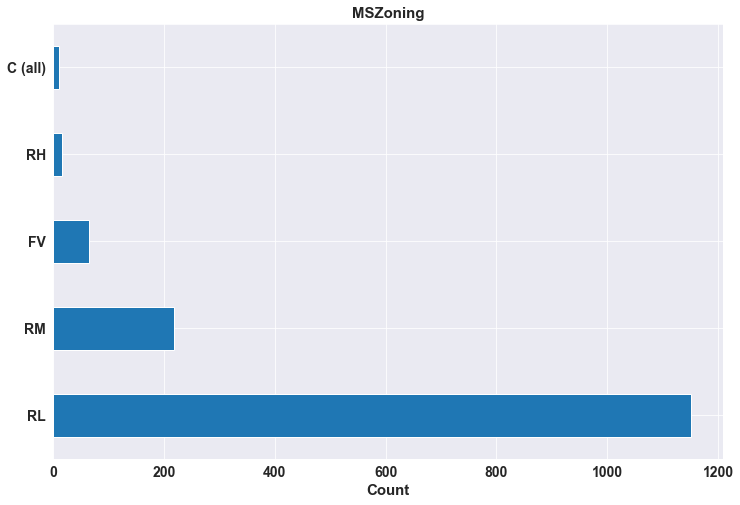

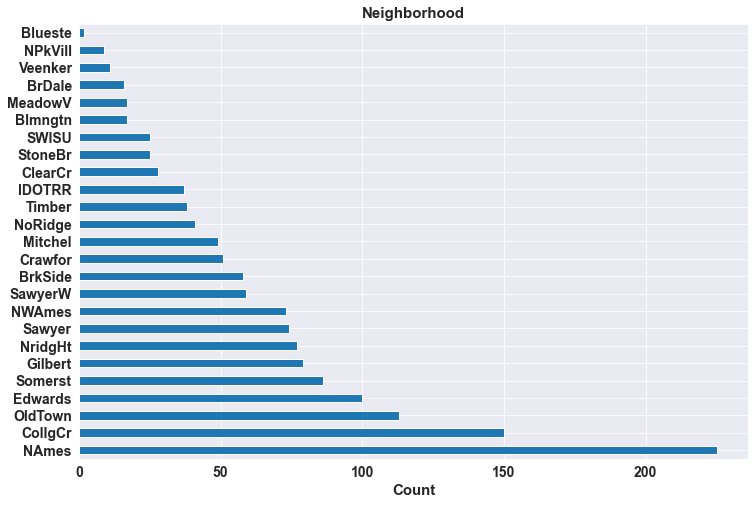

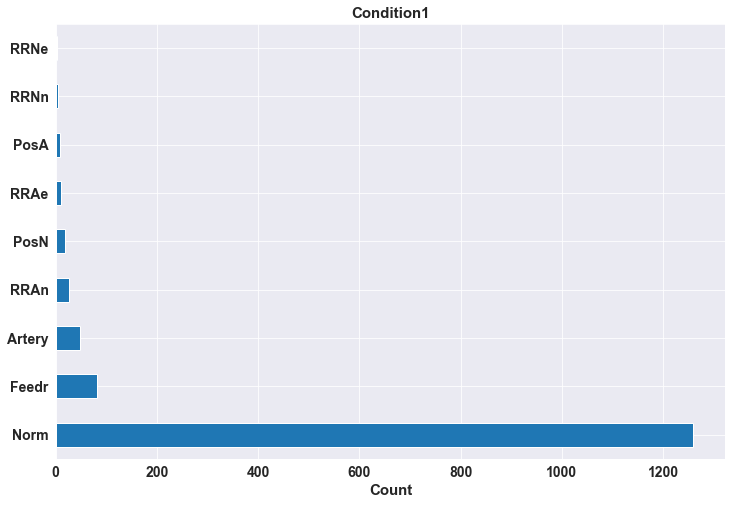

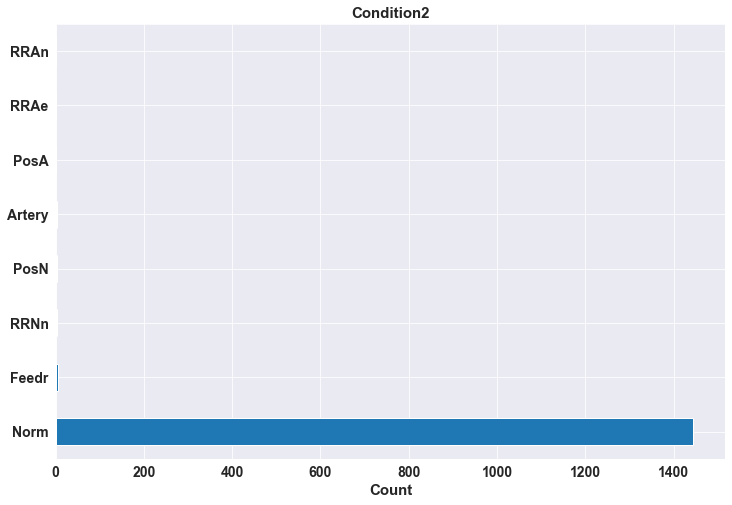

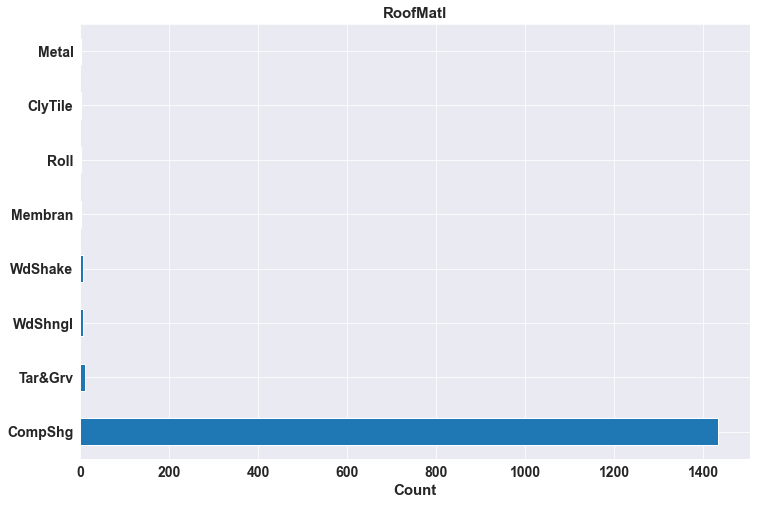

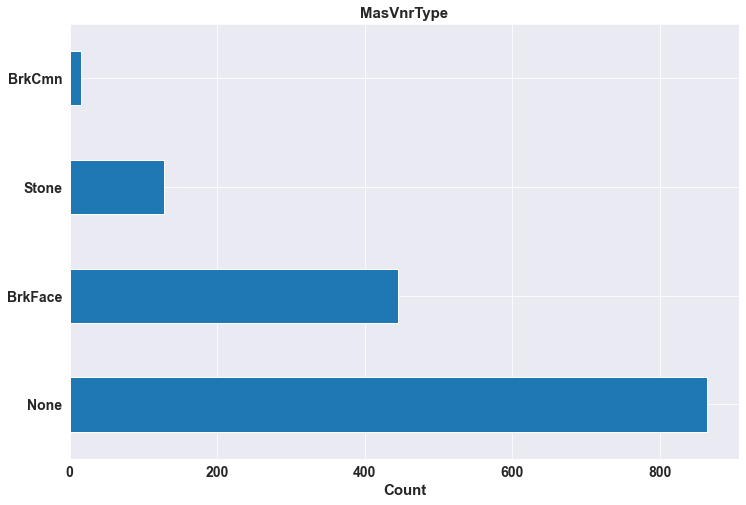

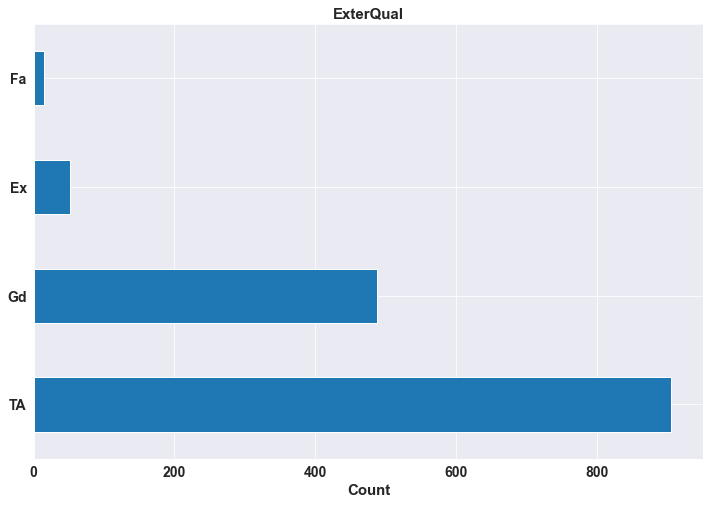

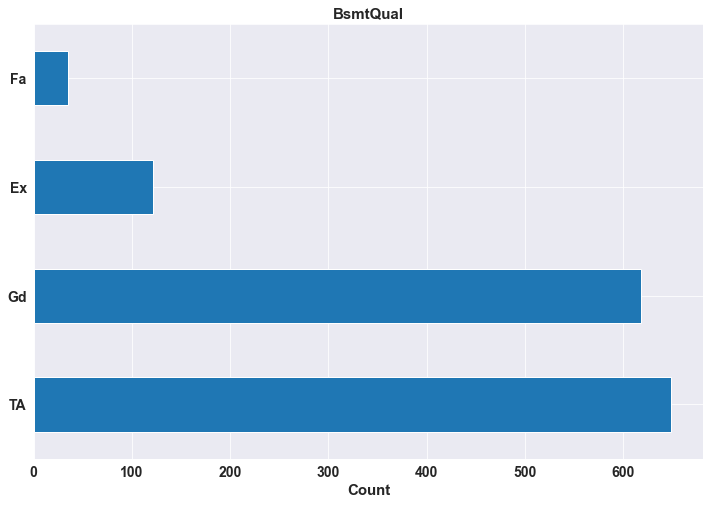

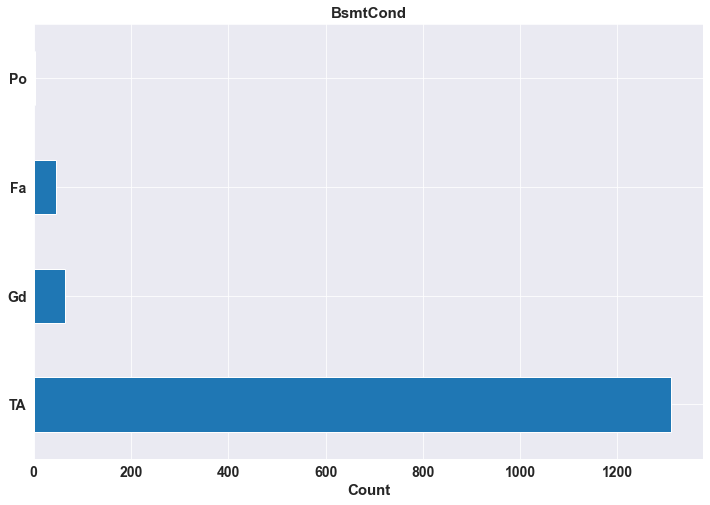

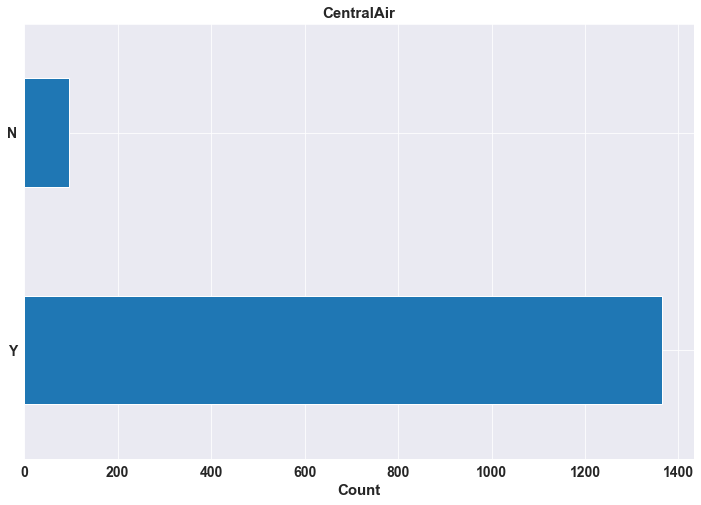

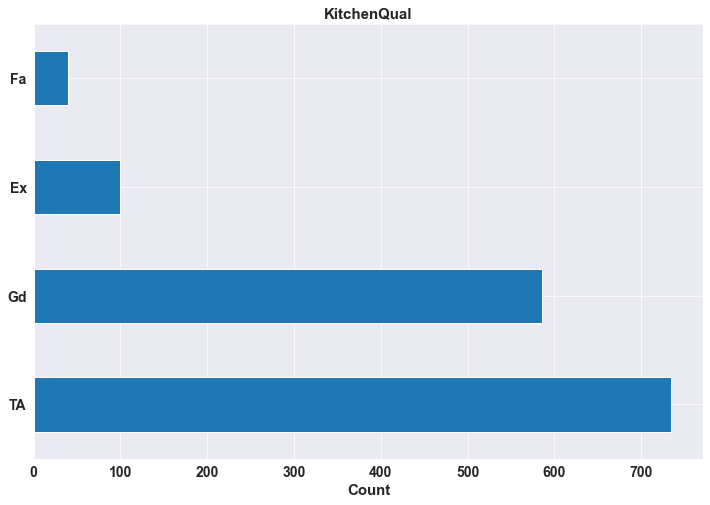

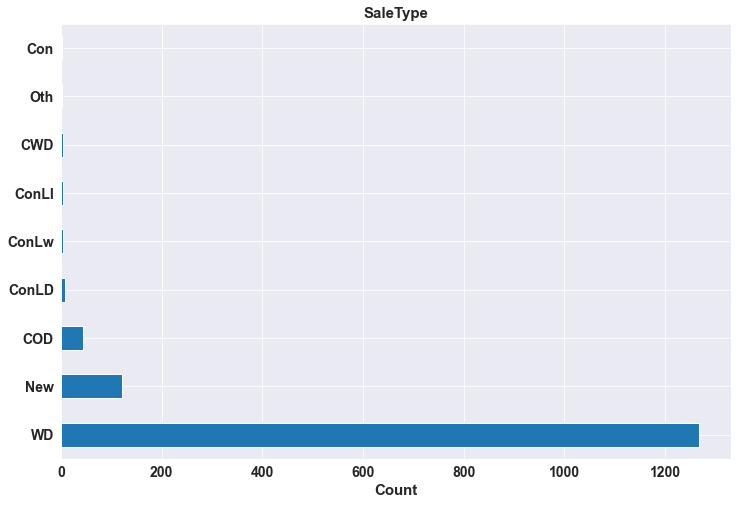

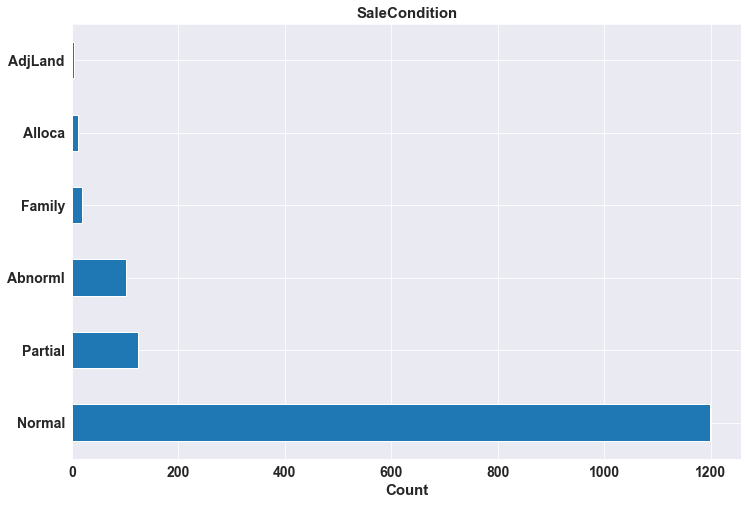

In [197]:
for i in selected_cat_vars:
    plot_cat(var = i, df = string_data)

Plotting this information allows us to answer to two questions:

Is there few or many categories for a given features?

Is there rare categories for some features?

Knowing about these peculiarities would help at designing the predictive pipeline

## Multivariate Analysis


### The Relationship Between the Target Variable (SalesPrice) and other variables (Predictors)

Firstly, let's start with some common sense (or domain knowledge):

Do we think about this variable when we are buying a house? (e.g. when we think about the house of our dreams, do we care about its 'Masonry veneer type'?).
If so, how important would this variable be? (e.g. what is the impact of having 'Excellent' material on the exterior instead of 'Poor'? And of having 'Excellent' instead of 'Good'?).
Is this information already described in any other variable? (e.g. if 'LandContour' gives the flatness of the property, do we really need to know the 'LandSlope'?).

Now, we have explored the two variables.
First, a correlation analysis was conducted to confirm the linear relationship between variables.
The 'corr' function helps you do this.
Seaborn's heatmap is a chart that helps visualize the results of correlation analysis.

In [82]:
#We can print a list of all columns:

sorted(list(df_train.columns))

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'Alley',
 'BedroomAbvGr',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtUnfSF',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'EnclosedPorch',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Fireplaces',
 'Foundation',
 'FullBath',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'Id',
 'KitchenAbvGr',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotArea',
 'LotConfig',
 'LotFrontage',
 'LotShape',
 'LowQualFinSF',
 'MSSubClass',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'Neighborhood',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PavedDrive',
 'PoolArea',
 'PoolQC',
 'RoofMatl',
 'RoofStyle

Let's go through the list above using the documentation and think about what could be useful.
We've done the exercise as well and came up with the following variables:

OverallQual - a tricky variable, an interesting exercise would be to predict 'OverallQual' using all the other variables     
 - available
 - YearBuilt
 - Neighborhood
 - TotalBsmtSF
 - GrLivArea

Now, we are going to check the relationship of these variables with the target variable SalePrice. You can continue with our list or feel free to replicate the steps with your own list.

In [112]:
plt.figure(figsize=(1,1))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 72x72 with 0 Axes>

In [113]:
def scaterplot(var, df):
    data = df[['SalePrice',var]]
    #fig = plt.figure(figsize = (50,20))
    #plt.figure(figsize=(1,1))
    data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))
    plt.title("SalePrice vs " +var,fontsize = 12,fontweight='bold')
    plt.xlabel(var,fontsize = 12,fontweight='bold')
    plt.ylabel("SalePrice",fontsize = 12,fontweight='bold')
    plt.xticks(fontsize=12,fontweight='bold');
    plt.yticks(fontsize=12,fontweight='bold');

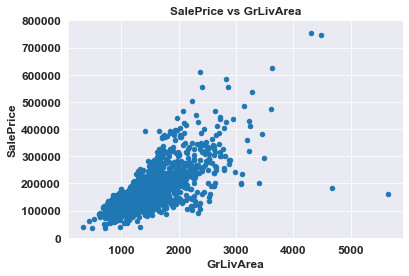

In [115]:
#Numerical Variables
#scatter plot grlivarea vs. SalePrice
scaterplot(var = 'GrLivArea', df = df_train)

In [84]:
#We can see a linear relationship in the picture above.

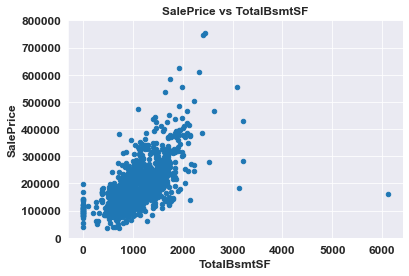

In [116]:
#scatter plot totalbsmtsf/saleprice
scaterplot(var = 'TotalBsmtSF', df = df_train)

In [86]:
# Here, we can see a quadratic relationship.

In [133]:
def boxplot_cat(var, df, rotation=0):
    data = df[['SalePrice',var]]
    fig, ax = plt.subplots(figsize=(12, 8))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig.axis(ymin=0, ymax=800000)
    plt.title("SalePrice vs " +var,fontsize = 14,fontweight='bold')
    plt.xlabel(var,fontsize = 14,fontweight='bold')
    plt.ylabel("SalePrice",fontsize = 14,fontweight='bold')
    plt.xticks(fontsize=12,fontweight='bold');
    plt.yticks(fontsize=12,fontweight='bold');
    plt.xticks(rotation=rotation)

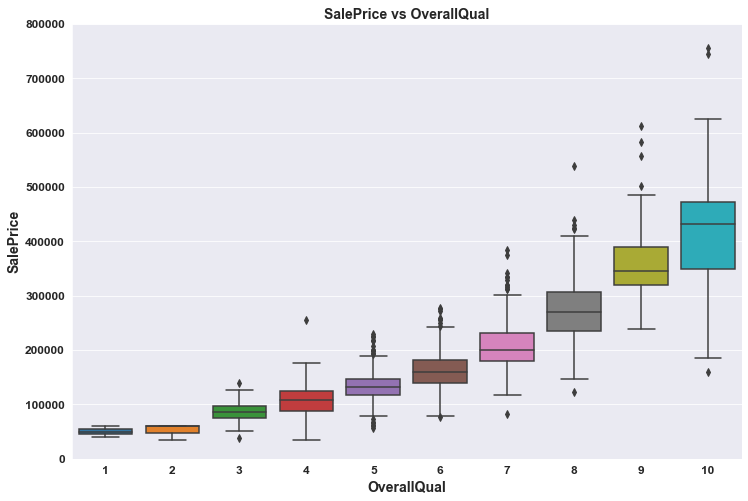

In [134]:
#Categorical Variables
# overallqual
boxplot_cat(var = 'OverallQual', df = df_train)

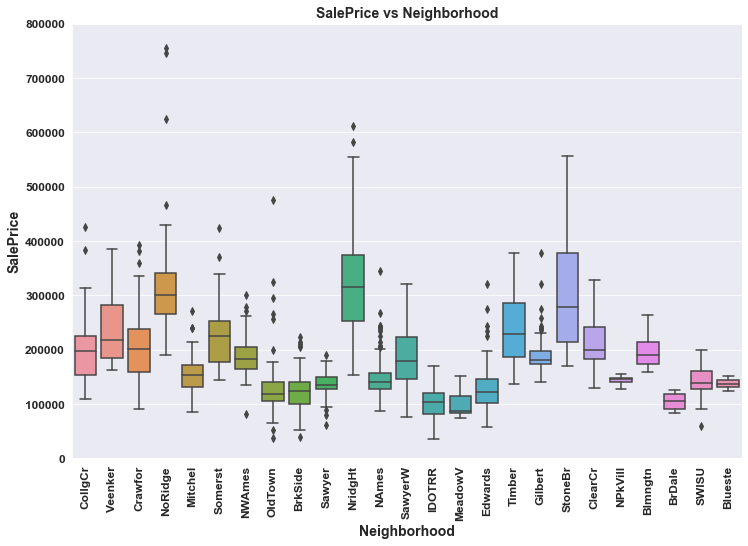

In [136]:
# Neighborhood
boxplot_cat(var = 'Neighborhood', df = df_train, rotation = 90)

**Multivariate Analysis**

In [154]:
# Check the Corelation of numerical variables with'SalePrice'
corr = df_train.iloc[:,1:].corr()[['SalePrice']].abs()
corr.style.background_gradient(cmap='coolwarm')

In [152]:
len(corr)

37

In [150]:
# We will try to take just the features which the corelation is higher than 0.50.
top_corr = corr.index[abs(corr["SalePrice"])>0.5]
corr_top = df_train[top_corr].corr()[['SalePrice']].abs()
corr_top.style.background_gradient(cmap='coolwarm')

In [151]:
print("The size of corelation data :", corr_top.shape)

The size of corelation data : (11, 1)


With the use of pairplot we will be able to see the relationship between our features variables which the correlation (linear corelation) is higer than 0.5 and the target variable. Here we had 9 features to use for training our model:

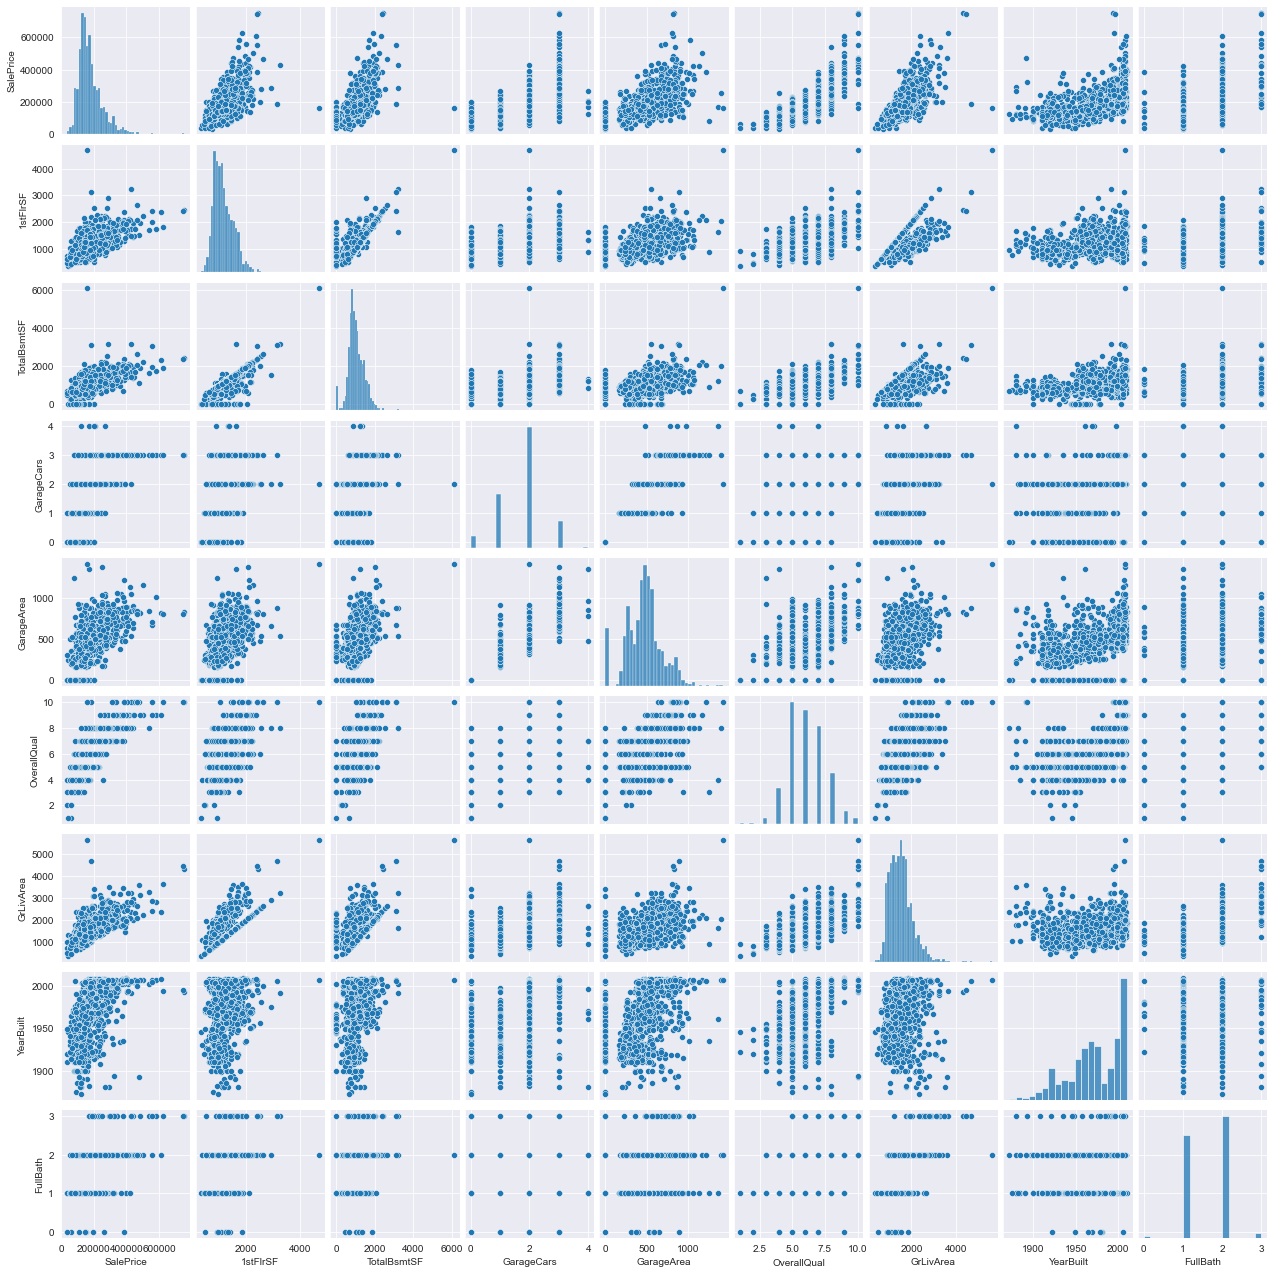

In [168]:
columns = ['SalePrice', '1stFlrSF','TotalBsmtSF','GarageCars','GarageArea','OverallQual','GrLivArea','YearBuilt','FullBath']
sns.pairplot(df_train[columns], height=2)

In [94]:
df_train.YrSold.value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

<AxesSubplot:ylabel='Frequency'>

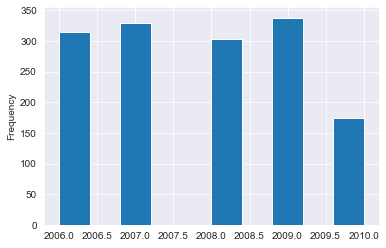

In [95]:
df_train.YrSold.plot.hist()

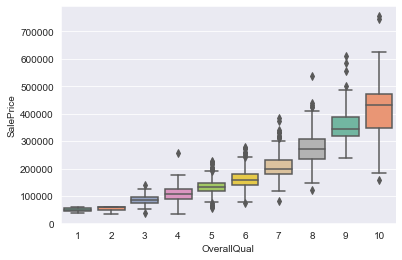

In [96]:
ax = sns.boxplot(x="OverallQual", y="SalePrice", data=df_train, palette="Set2")

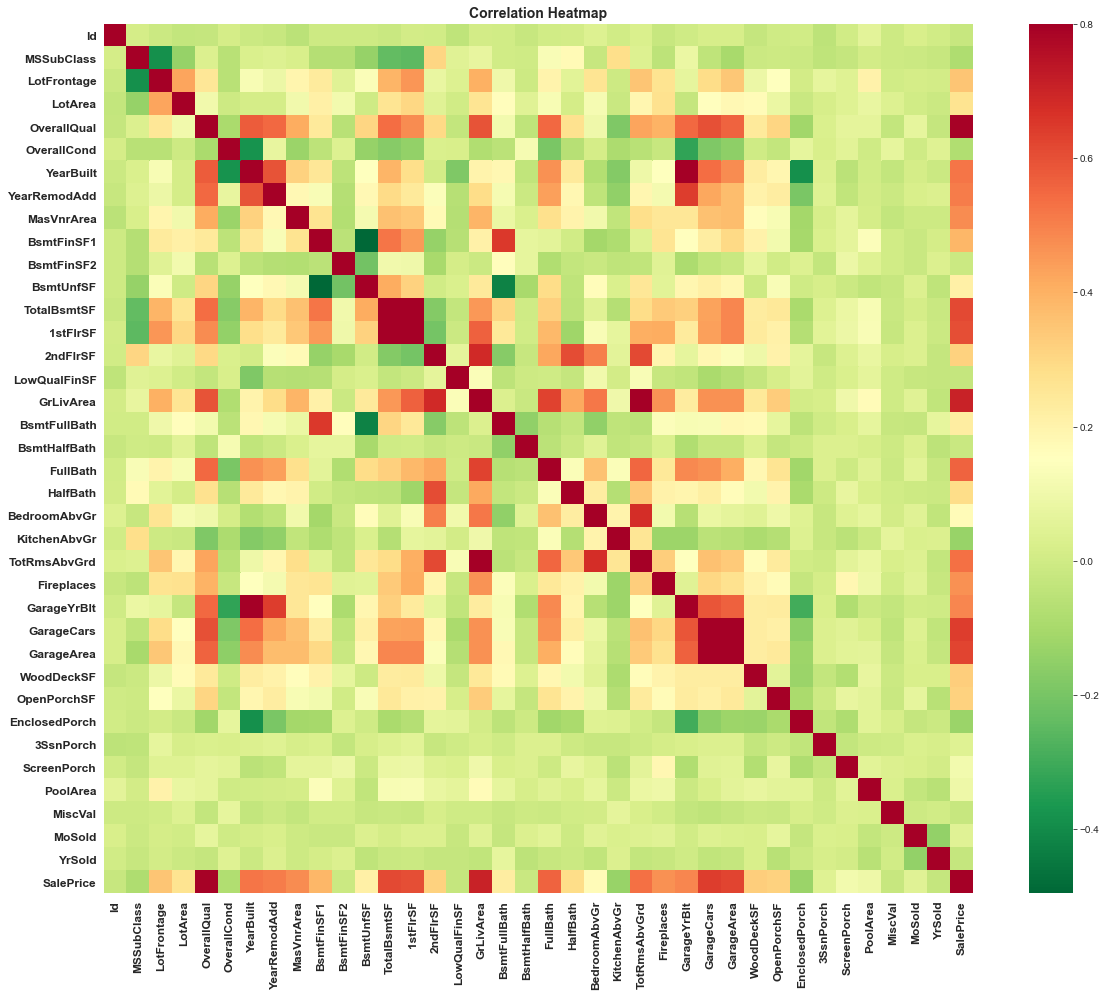

In [157]:
#Multivariate Analysis
#Let's look at a correlation matrix between numeric attributes:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(20, 16))
#fig = plt.figure(figsize=(20, 16))
sns.heatmap(corrmat, vmax=.8, square=True,cmap="RdYlGn_r")
plt.title("Correlation Heatmap", fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight='bold');
plt.yticks(fontsize=12,fontweight='bold');

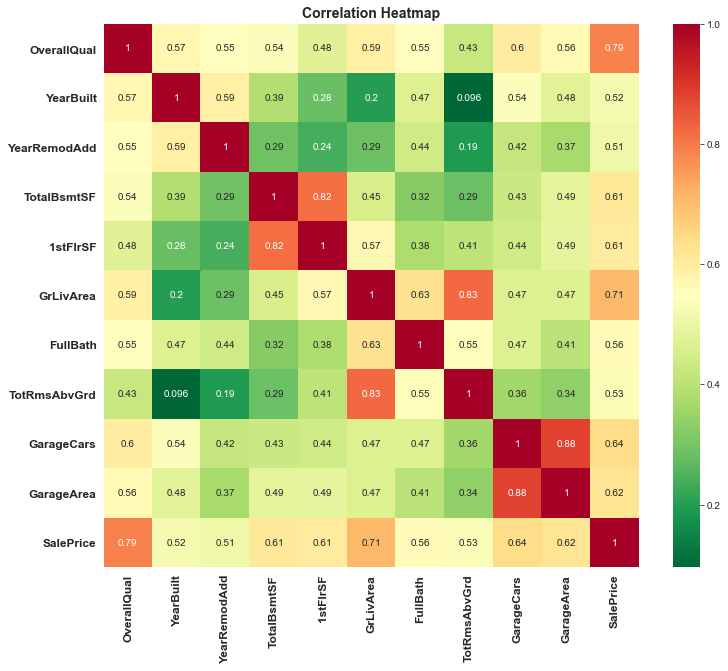

In [158]:
# To make it more readable we can plot only those variables that correlate with the target variable more than 0.5:
# most correlated features with SalePrice
#top10_corr = corr_matrix.sort_values('SalePrice', ascending= False)[0:10]
#top10_corr = top10_corr.loc[:, top10_corr.index]
corrmat = df_train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(12,10))
g = sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap="RdYlGn_r")
plt.title("Correlation Heatmap", fontsize=14,fontweight='bold')
plt.xticks(fontsize=12,fontweight='bold');
plt.yticks(fontsize=12,fontweight='bold');

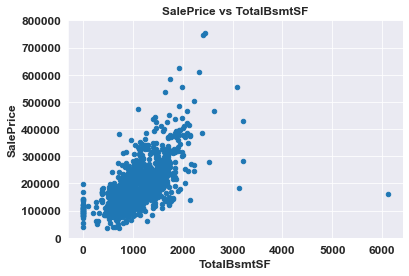

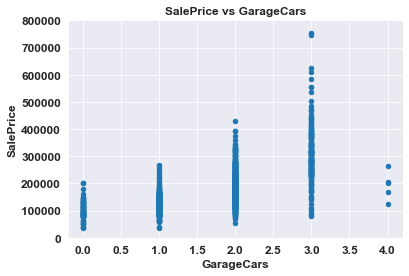

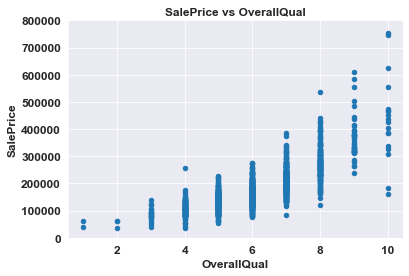

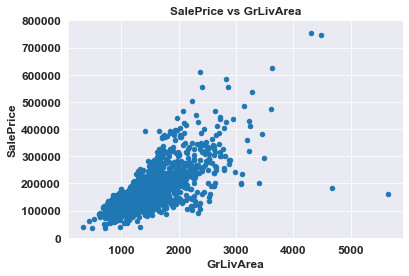

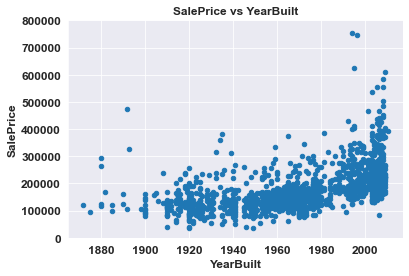

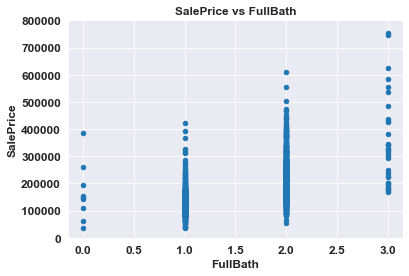

In [170]:
top_correlated_features = ['TotalBsmtSF','GarageCars','OverallQual','GrLivArea','YearBuilt','FullBath']
for i in top_correlated_features:
    scaterplot(i, df_train)

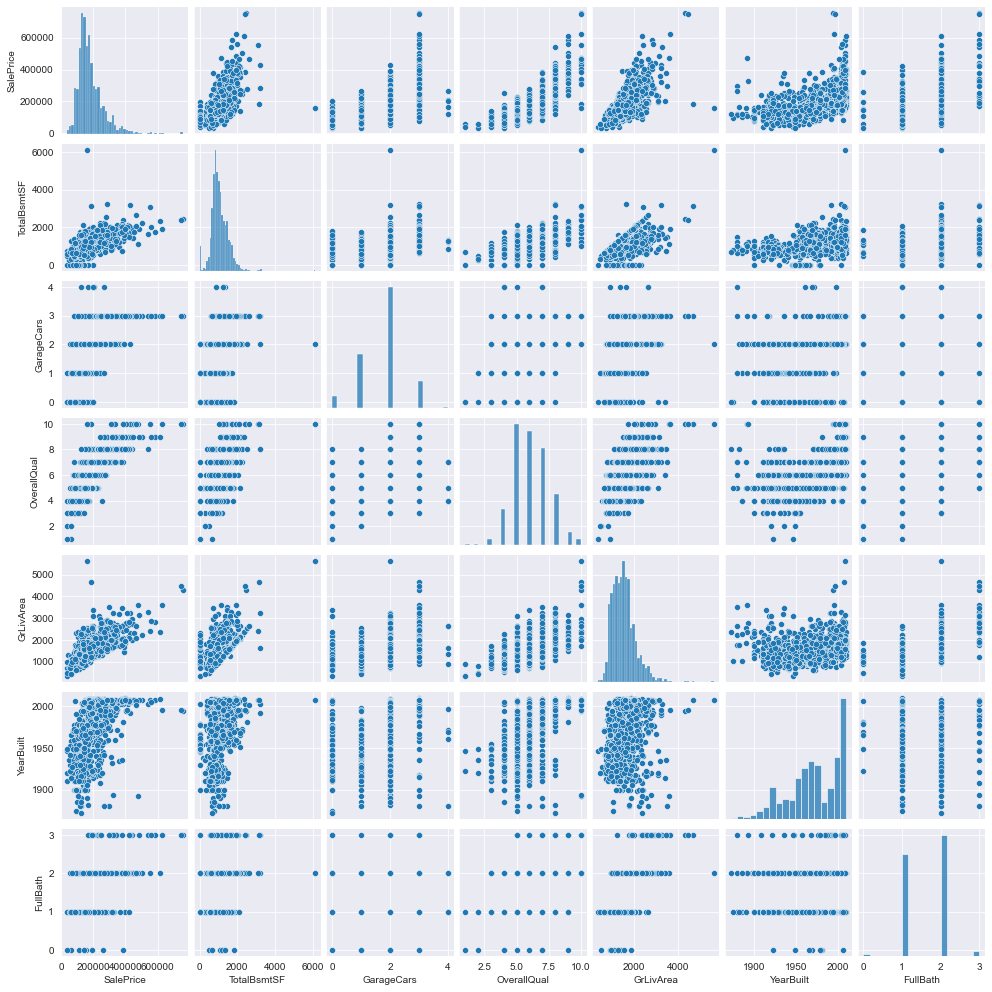

In [198]:
columns = ['SalePrice','TotalBsmtSF','GarageCars','OverallQual','GrLivArea','YearBuilt','FullBath']
sns.pairplot(df_train[columns], height=2)

These are the variables most correlated with SalePrice. Our thoughts on this:

- 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. Check!
- 'GarageCars' and 'GarageArea' are also among the most strongly correlated variables. 
  - The number of cars that fit into a garage is a consequence of the garage area. 
  - 'GarageCars' and 'GarageArea' are like twin brothers. 
  - You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
- 'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' just to be able to say that our first guess was right :).
- 'FullBath'?? Really?
- 'TotRmsAbvGrd' and 'GrLivArea' – twin brothers again.
- 'YearBuilt': It seems that 'YearBuilt' is slightly correlated with 'SalePrice'. Therefore, we could also look at the problem as time-series analysis but we will have enough time for that later in the course.


Variables that correlated with 'SalePrice': 'OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'YearBuilt'. '1stFlrSF', 'GarageCars', 'TotRmsAbvGrd' are excluded because they are related to one of those 4. 'FullBath' is considered not so important.

In [100]:
df_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

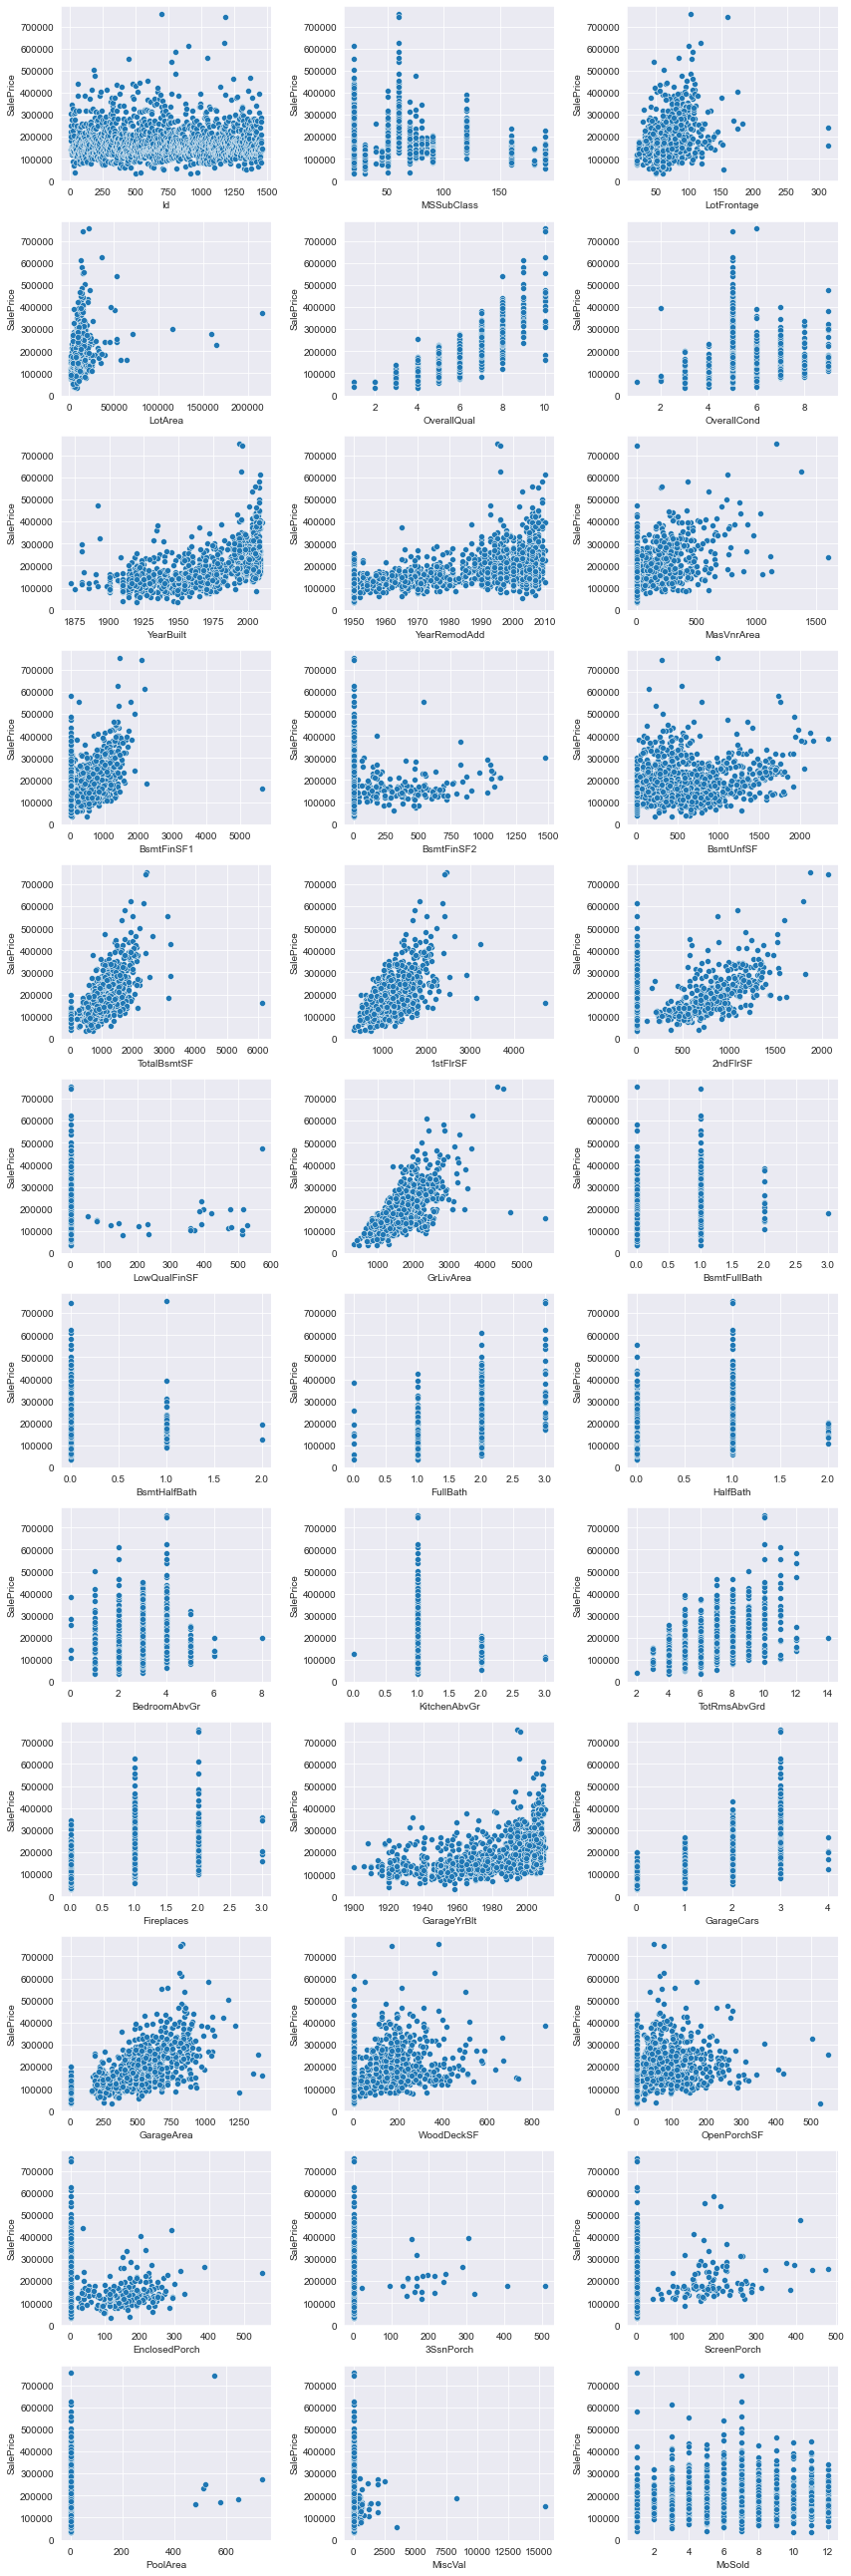

In [101]:
n_rows = 12
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize= (4*n_cols, 3*n_rows))

for row in range(n_rows):
    for col in range(n_cols):
        i = row * n_cols + col
        if i > len(quantitatives) - 2:
            break
        variable = quantitatives[i]
        sns.scatterplot(x= df_train[variable], y= df_train['SalePrice'], ax= axs[row, col])

plt.tight_layout()
plt.show()

From those charts, highly correlated variables mentioned above 
have sort of linear relationship with 'SalePrice'. Those charts also imply some exponential relationships, so we can log transform some features to get a better model.

Candidates for log transformation: 'LotFrontage', 'LotArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea'.

We can see that some variables are rather categorical variables, and some outliers need to be eliminate.

**Categorical Variables**

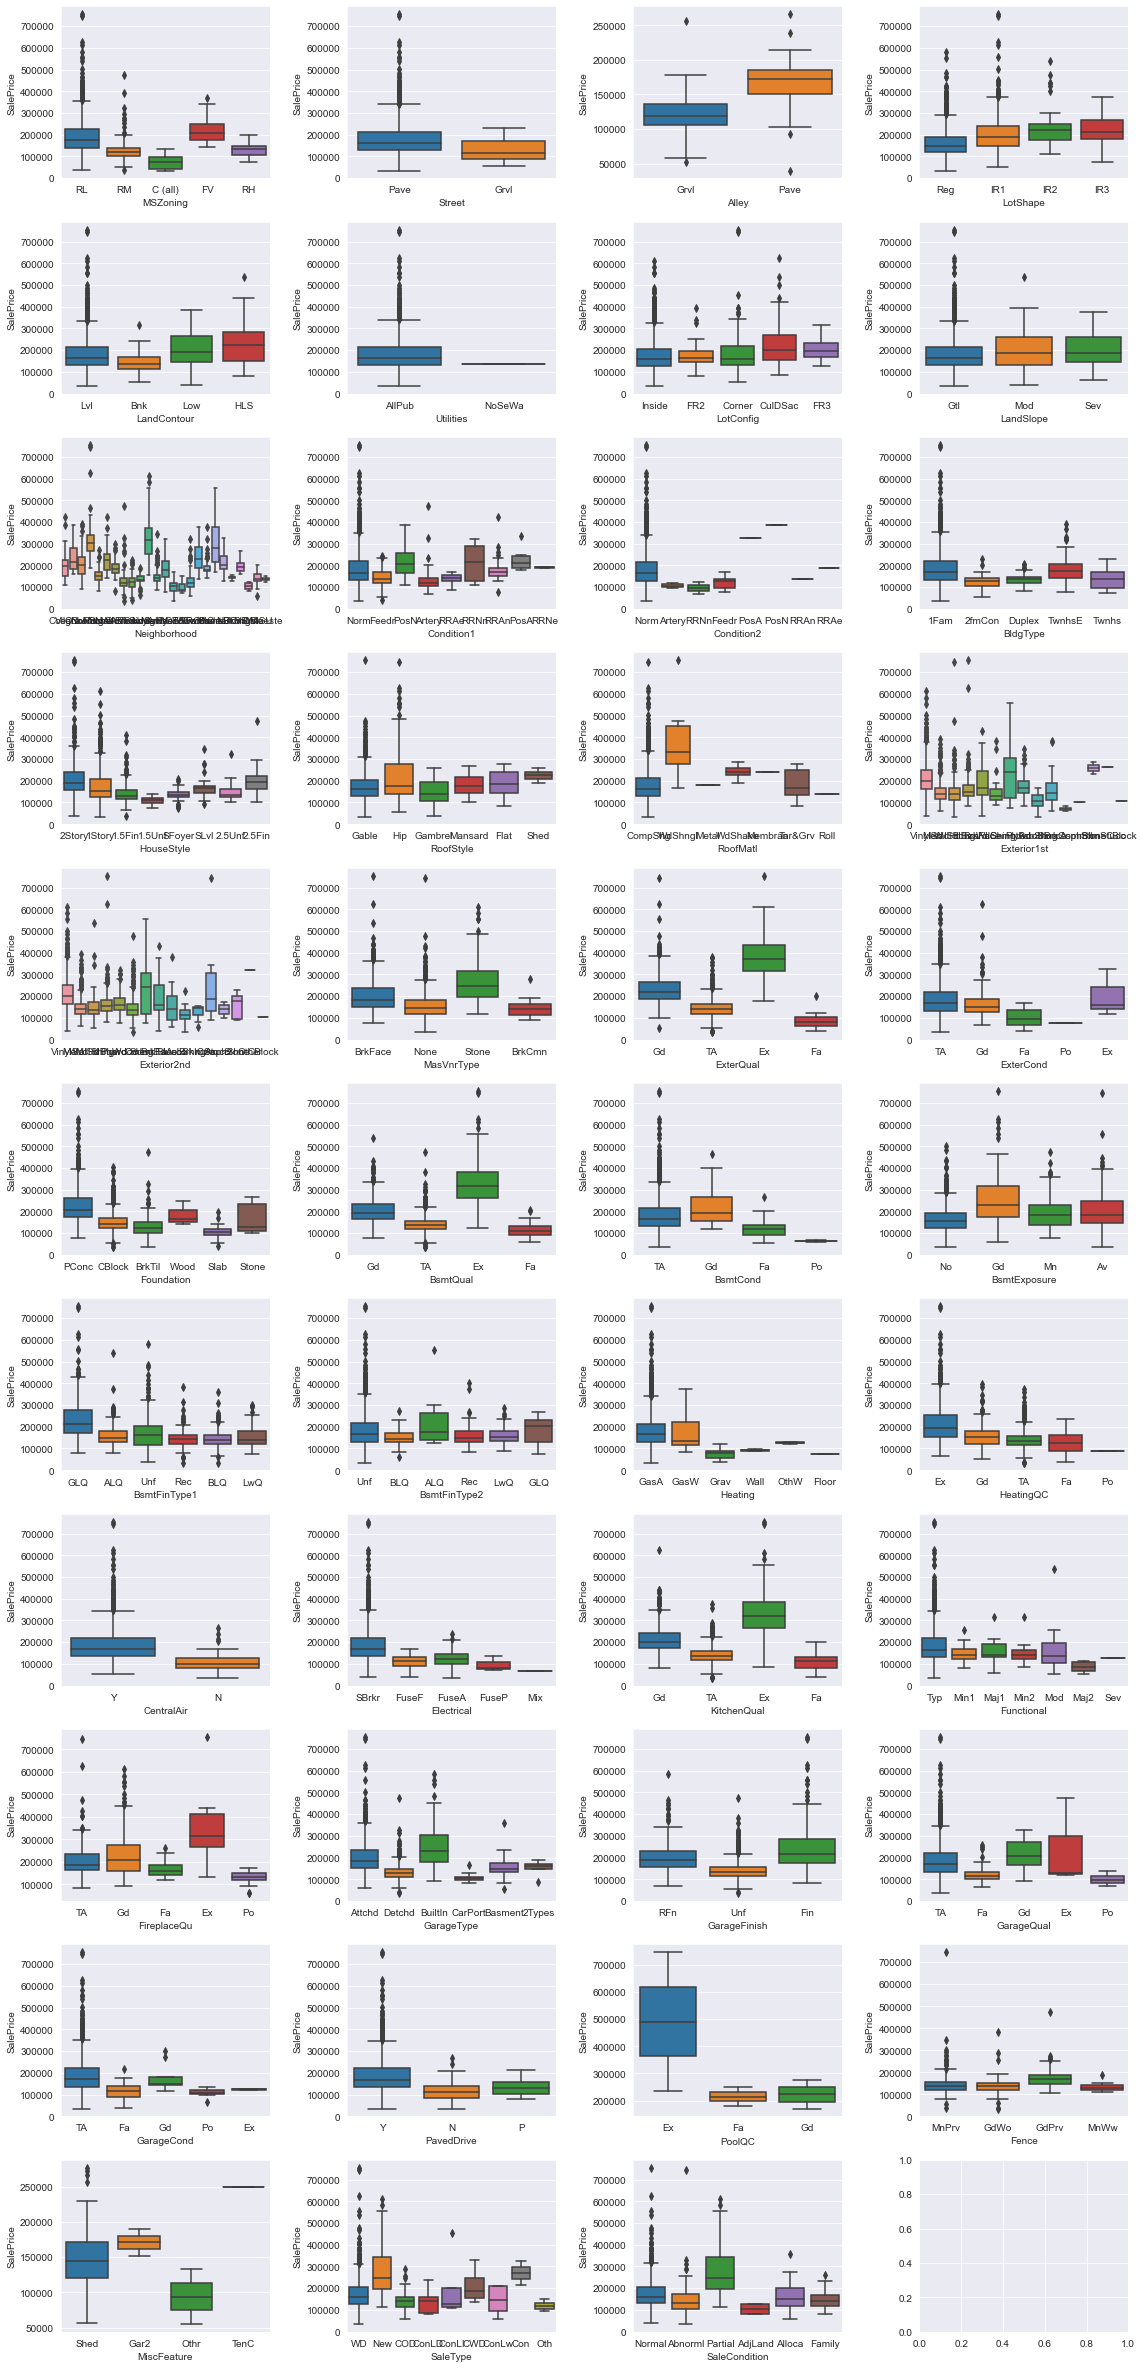

In [110]:
n_rows = 11
n_cols = 4

fig, axs = plt.subplots(n_rows, n_cols, figsize= (4*n_cols, 3*n_rows))

for row in range(n_rows):
    for col in range(n_cols):
        i = row * n_cols + col
        if i >= len(qualitatives):
            break
        variable = qualitatives[i]
        sns.boxplot(x= df_train[variable], y= df_train['SalePrice'], ax= axs[row, col])
        
plt.tight_layout()
plt.show()

From the plots:

Variables having good disparity with respect to 'SalePrice' are: ‘MSZoning’, ’Neighborhood’, ‘Condition1’, ‘Condition2’, ‘RoofMatl’, ‘MatVnrType’, ’ExterQual’, ‘BsmtQual’, ‘BsmtCond’, ‘CentralAir’, ’KitchenQual’, ‘SaleType’, ‘SaleCondition’. House that have excellent Pool Quality tends to have higher sale price.

Partial sale condition tends to have higher sale price.

In [ ]:
n_rows = 11
n_cols = 4

fig, axs = plt.subplots(n_rows, n_cols, figsize= (4*n_cols, 3*n_rows))

for row in range(n_rows):
    for col in range(n_cols):
        i = row * n_cols + col
        if i >= len(qualitatives):
            break
        variable = qualitatives[i]
        sns.boxplot(x= df_train[variable], y= df_train['SalePrice'], ax= axs[row, col])
        
plt.tight_layout()
plt.show()

In [202]:
cat_vars = ['MSZoning', 'Neighborhood', 'Condition1', 'Condition2', 'RoofMatl',
            'MasVnrType', 'ExterQual', 'BsmtQual', 'BsmtCond', 'CentralAir', 
            'KitchenQual', 'SaleType', 'SaleCondition']

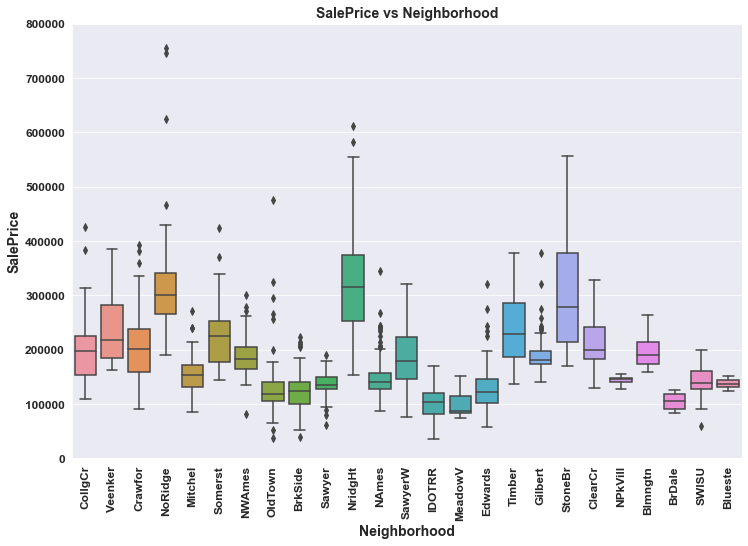

In [205]:
 boxplot_cat('Neighborhood', df_train, rotation=90)

In [203]:
def boxplot_cat(var, df, rotation=0):
    data = df[['SalePrice',var]]
    fig, ax = plt.subplots(figsize=(12, 8))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig.axis(ymin=0, ymax=800000)
    plt.title("SalePrice vs " +var,fontsize = 14,fontweight='bold')
    plt.xlabel(var,fontsize = 14,fontweight='bold')
    plt.ylabel("SalePrice",fontsize = 14,fontweight='bold')
    plt.xticks(fontsize=12,fontweight='bold');
    plt.yticks(fontsize=12,fontweight='bold');
    plt.xticks(rotation=rotation)

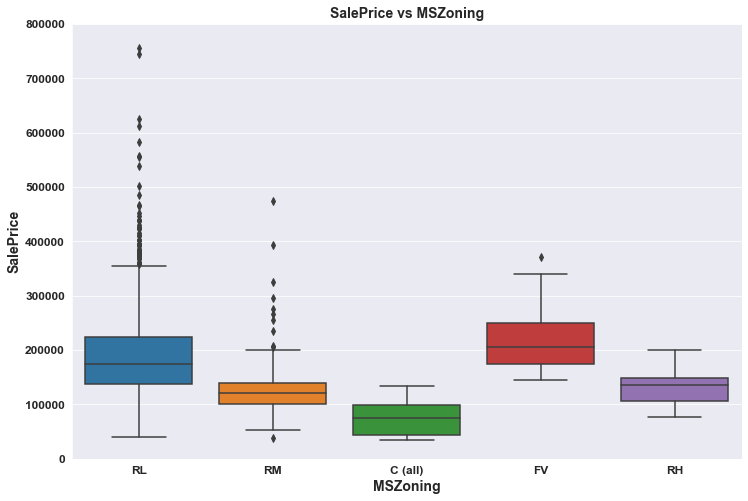

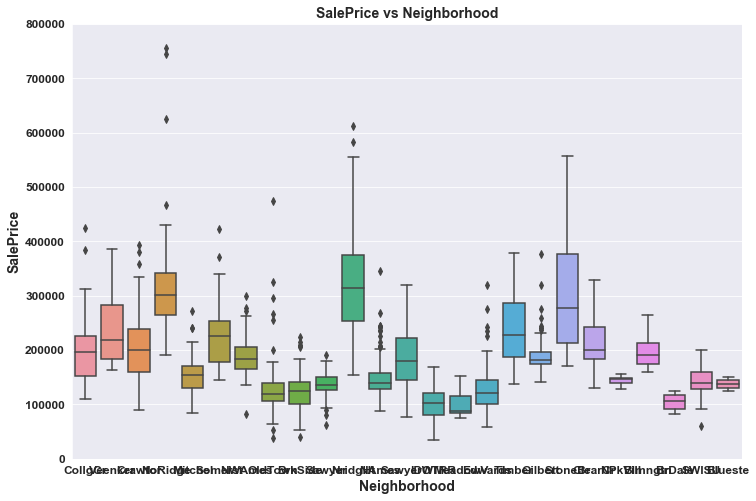

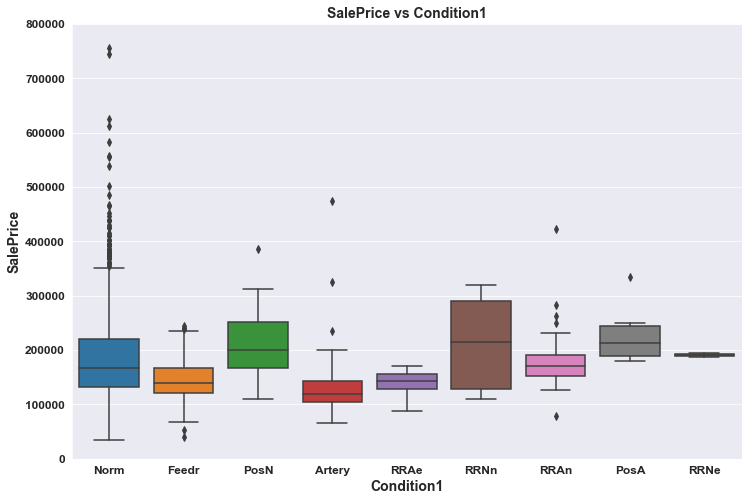

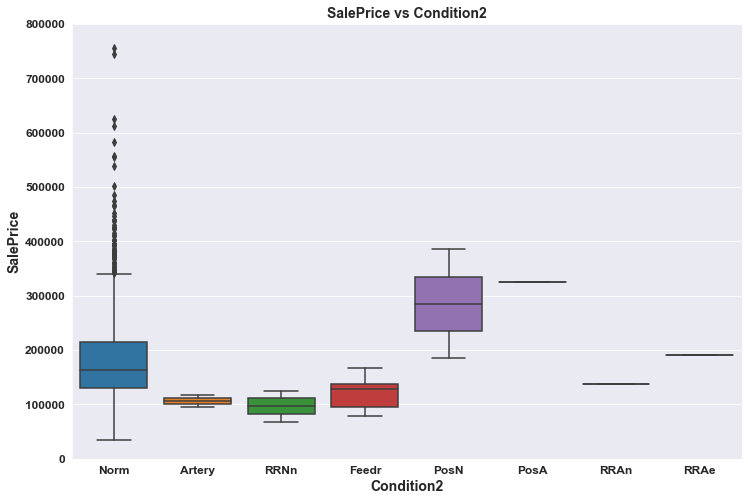

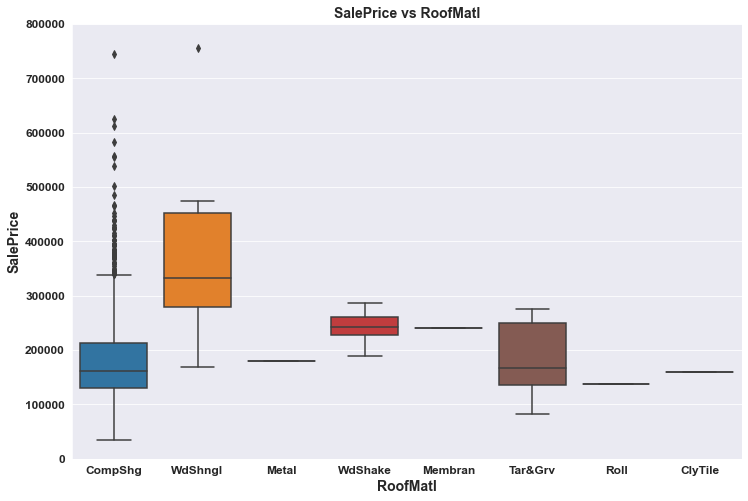

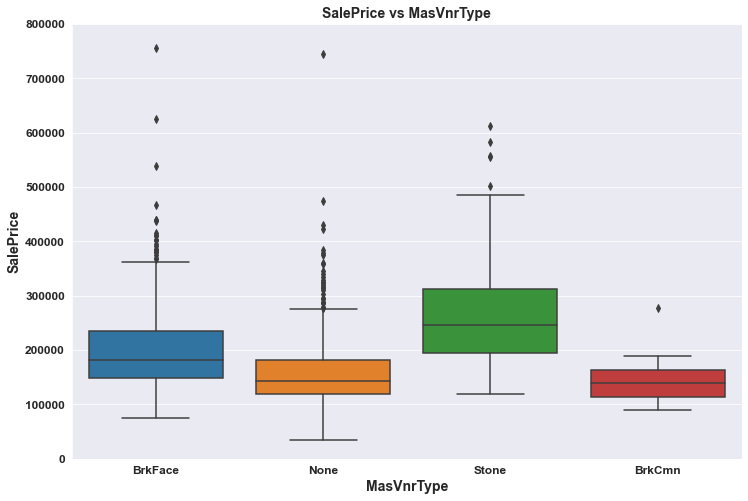

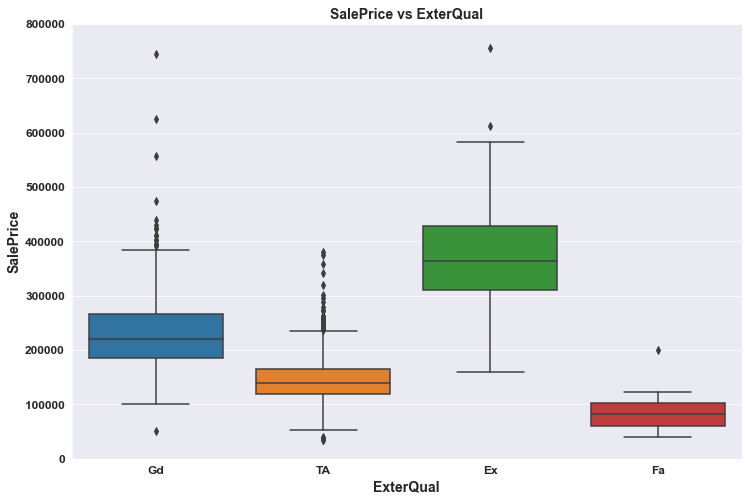

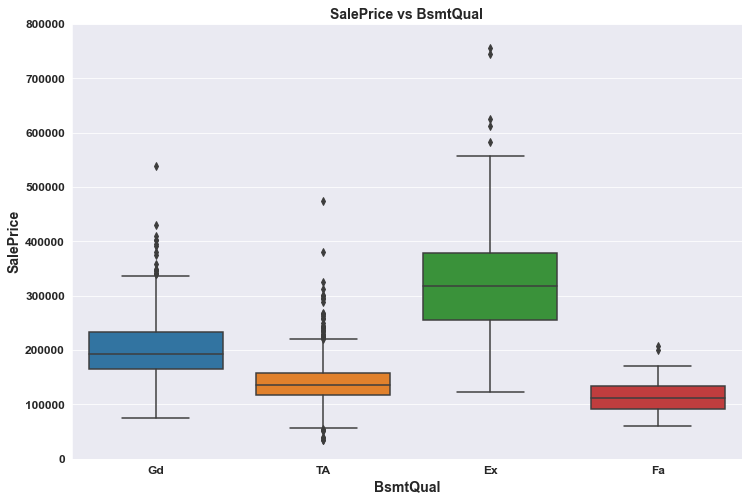

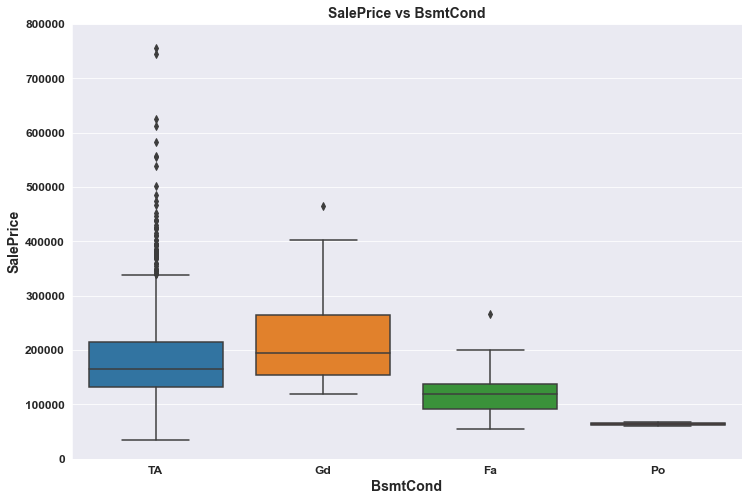

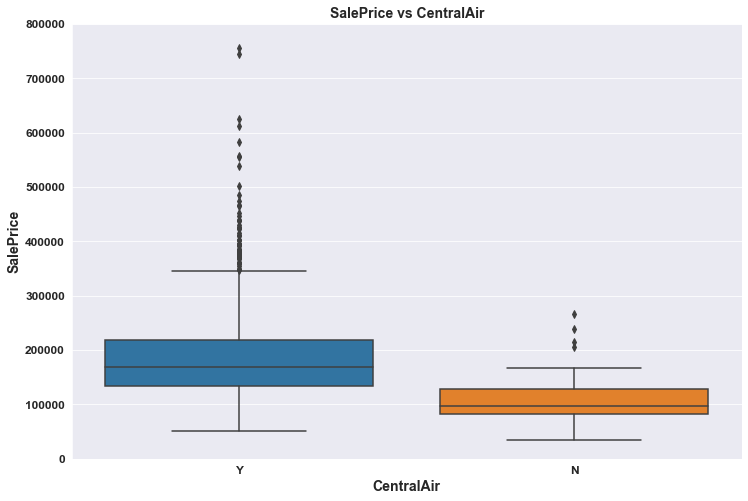

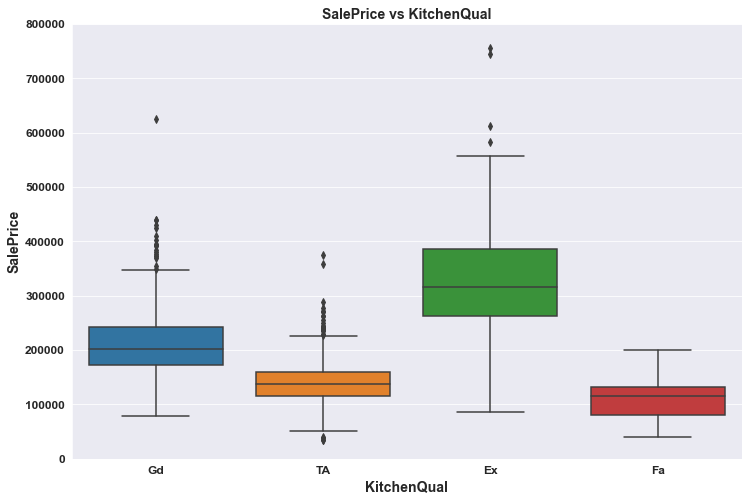

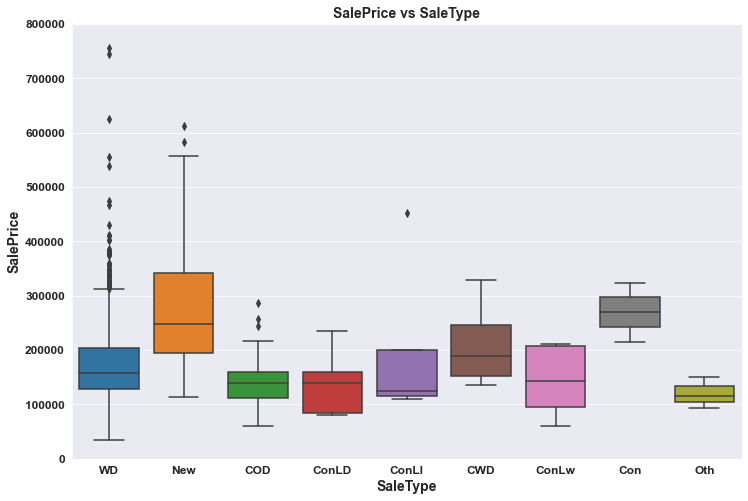

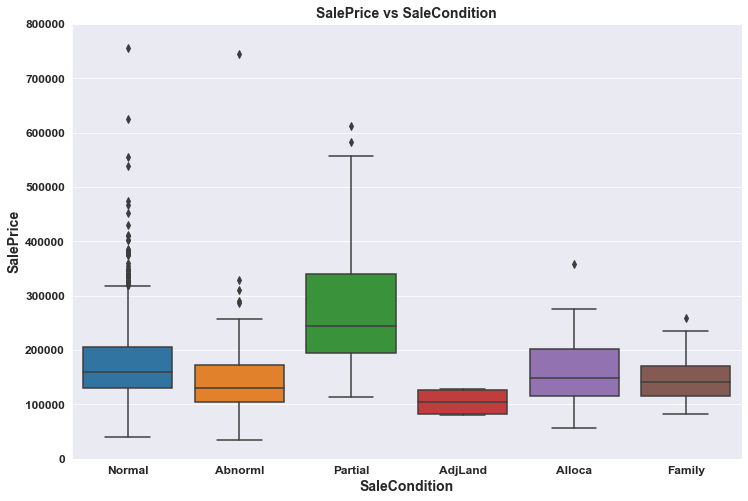

In [204]:
for i in cat_vars:
    boxplot_cat(i, df_train, rotation=0)
    